# 5.1 Datasets

## 5.1.2 Data Preprocessing

### Loading CSV file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [70]:
spotify_data_small=pd.read_csv('D:/SpotifyProject/combined_moods1.csv')

In [71]:
spotify_data_small

energy  liveness    tempo  speechiness  acousticness  instrumentalness  \
0      0.888    0.3060  144.111       0.0987      0.000455          0.000000   
1      0.835    0.0795   84.858       0.0911      0.058300          0.000003   
2      0.953    0.1050  109.952       0.0750      0.000035          0.000020   
3      0.971    0.3370  125.996       0.1070      0.000090          0.019700   
4      0.886    0.1130  173.965       0.2500      0.000645          0.000000   
...      ...       ...      ...          ...           ...               ...   
3735   0.804    0.3300  144.992       0.0358      0.004100          0.000000   
3736   0.924    0.2040  127.937       0.0310      0.000972          0.007030   
3737   0.815    0.1760  121.986       0.0858      0.060600          0.000000   
3738   0.627    0.2220  125.965       0.0966      0.009740          0.000000   
3739   0.575    0.2520  117.999       0.0801      0.374000          0.000000   

      danceability  duration_ms  loudness  valence  \
0            0.426       191520    -3.720    0.387   
1            0.688       230493    -4.162    0.880   
2            0.503       199949    -4.980    0.224   
3            0.574       209762    -3.868    0.459   
4            0.358       213000    -4.480    0.238   
...            ...          ...       ...      ...   
3735         0.538       197640    -5.194    0.507   
3736         0.707       206413    -2.842    0.919   
3737         0.598       188852    -4.481    0.383   
3738         0.717       170786    -8.198    0.437   
3739         0.693       211362    -6.998    0.492   

                                            name                artist  \
0                                         Throne  Bring Me The Horizon   
1     Remember the Name (feat. Styles of Beyond)            Fort Minor   
2                                     Dead To Me     From Ashes to New   
3                                   Crash N Burn          Above Snakes   
4                      Struggle Made Me Stronger   Fearless Motivation   
...                                          ...                   ...   
3735                                   All Night             The Vamps   
3736                  Feel So Close - Radio Edit         Calvin Harris   
3737                               Ready To Love                 KSHMR   
3738                Rule The World (feat. ILIRA)       GAMPER & DADONI   
3739                                   Happy Now                  Kygo   

                                             track_link  \
0     https://open.spotify.com/track/0M3adYbGtyRHACP...   
1     https://open.spotify.com/track/6ndmKwWqMozN2tc...   
2     https://open.spotify.com/track/77wSM48dw3GQY7y...   
3     https://open.spotify.com/track/2JNBea8tDU4sNMF...   
4     https://open.spotify.com/track/3vMtLNMANvkPuDt...   
...                                                 ...   
3735  https://open.spotify.com/track/4lhqb6JvbHId48O...   
3736  https://open.spotify.com/track/07rDOk6qeP4Cpql...   
3737  https://open.spotify.com/track/11MhisqewmtL3qG...   
3738  https://open.spotify.com/track/4VEEDnEFLI9dUy5...   
3739  https://open.spotify.com/track/0ct6r3EGTcMLPtr...   

                          id   mood  
0     0M3adYbGtyRHACP86dey1H  Angry  
1     6ndmKwWqMozN2tcZqzCX4K  Angry  
2     77wSM48dw3GQY7ylaJB3GH  Angry  
3     2JNBea8tDU4sNMFJAOpaCu  Angry  
4     3vMtLNMANvkPuDthcLuQzJ  Angry  
...                      ...    ...  
3735  0dXNQ8dckG4eYfEtq9zcva  Happy  
3736  1gihuPhrLraKYrJMAEONyc  Happy  
3737  0cvMWzztDy1wNQkBqae8w4  Happy  
3738  3yvHcaY61FpeSiLiHiIST4  Happy  
3739  14sOS5L36385FJ3OL8hew4  Happy  

[3740 rows x 15 columns]

In [72]:
spotify_data_small.shape

(3740, 15)

In [73]:
spotify_data_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            3740 non-null   float64
 1   liveness          3740 non-null   float64
 2   tempo             3740 non-null   float64
 3   speechiness       3740 non-null   float64
 4   acousticness      3740 non-null   float64
 5   instrumentalness  3740 non-null   float64
 6   danceability      3740 non-null   float64
 7   duration_ms       3740 non-null   int64  
 8   loudness          3740 non-null   float64
 9   valence           3740 non-null   float64
 10  name              3740 non-null   object 
 11  artist            3740 non-null   object 
 12  track_link        3740 non-null   object 
 13  id                3740 non-null   object 
 14  mood              3740 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 438.4+ KB


### Cleaning null values from dataset

In [74]:
missing_values = spotify_data_small.isnull().sum()
print(missing_values)

energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
danceability        0
duration_ms         0
loudness            0
valence             0
name                0
artist              0
track_link          0
id                  0
mood                0
dtype: int64


In [75]:
rows_with_missing_values = spotify_data_small[spotify_data_small.isnull().any(axis=1)]

print(rows_with_missing_values)

Empty DataFrame
Columns: [energy, liveness, tempo, speechiness, acousticness, instrumentalness, danceability, duration_ms, loudness, valence, name, artist, track_link, id, mood]
Index: []


In [76]:
cleaned_df_small = spotify_data_small.dropna()

In [77]:
missing_values = cleaned_df_small.isnull().sum()
print(missing_values)

energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
danceability        0
duration_ms         0
loudness            0
valence             0
name                0
artist              0
track_link          0
id                  0
mood                0
dtype: int64


### Cleaning duplicate values from dataset

In [78]:
duplicate_rows = cleaned_df_small[cleaned_df_small.duplicated(subset=['name', 'id'], keep=False)]
print(duplicate_rows)

      energy  liveness    tempo  speechiness  acousticness  instrumentalness  \
0      0.888    0.3060  144.111       0.0987      0.000455          0.000000   
43     0.890    0.2010   90.598       0.0603      0.000481          0.000820   
54     0.886    0.2600  126.025       0.0837      0.000450          0.000000   
57     0.937    0.6060  164.032       0.1610      0.000209          0.000004   
61     0.953    0.2810  172.063       0.0704      0.010600          0.000000   
...      ...       ...      ...          ...           ...               ...   
3678   0.936    0.0879  124.034       0.0729      0.177000          0.000000   
3682   0.872    0.3710  126.050       0.1400      0.023900          0.000007   
3692   0.685    0.1600  118.016       0.0309      0.166000          0.000012   
3700   0.825    0.0674  102.977       0.0601      0.008830          0.000000   
3712   0.678    0.1010  103.952       0.0324      0.015100          0.000006   

      danceability  duration_ms  loudne

In [79]:
cleaned_df_small = cleaned_df_small.drop_duplicates(subset=['name', 'id', ])
final_row_count = len(cleaned_df_small)

print("Count of final rows:", final_row_count)

Count of final rows: 3340


In [80]:
cleaned_df_small.shape

(3340, 15)

## 5.1.3 Data Exploration

### Correlation Heatmap on smaller dataset

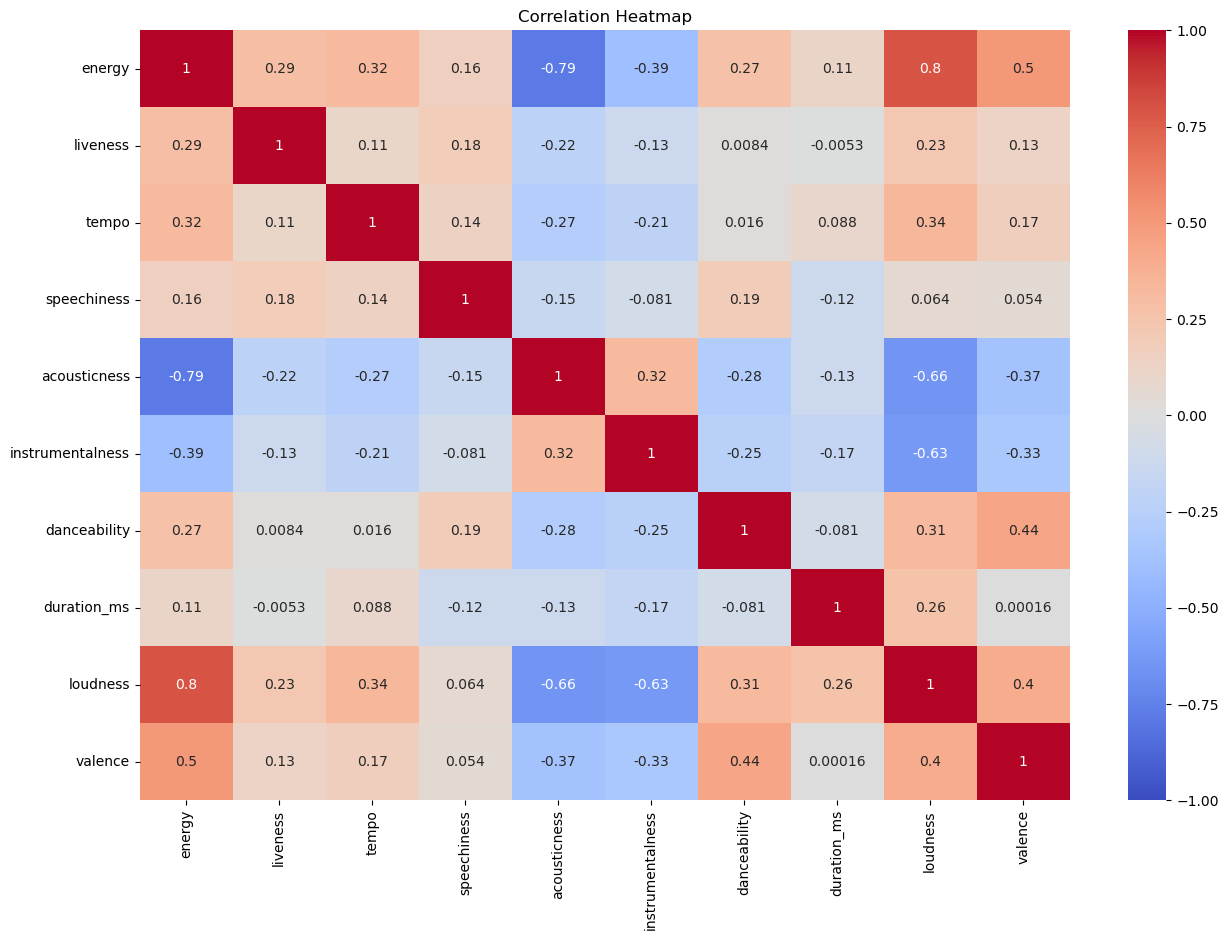

In [171]:
correlation_matrix = cleaned_df_small.drop(columns=['name', 'artist', 'id', 'mood','track_link']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### Count of instances per mood category

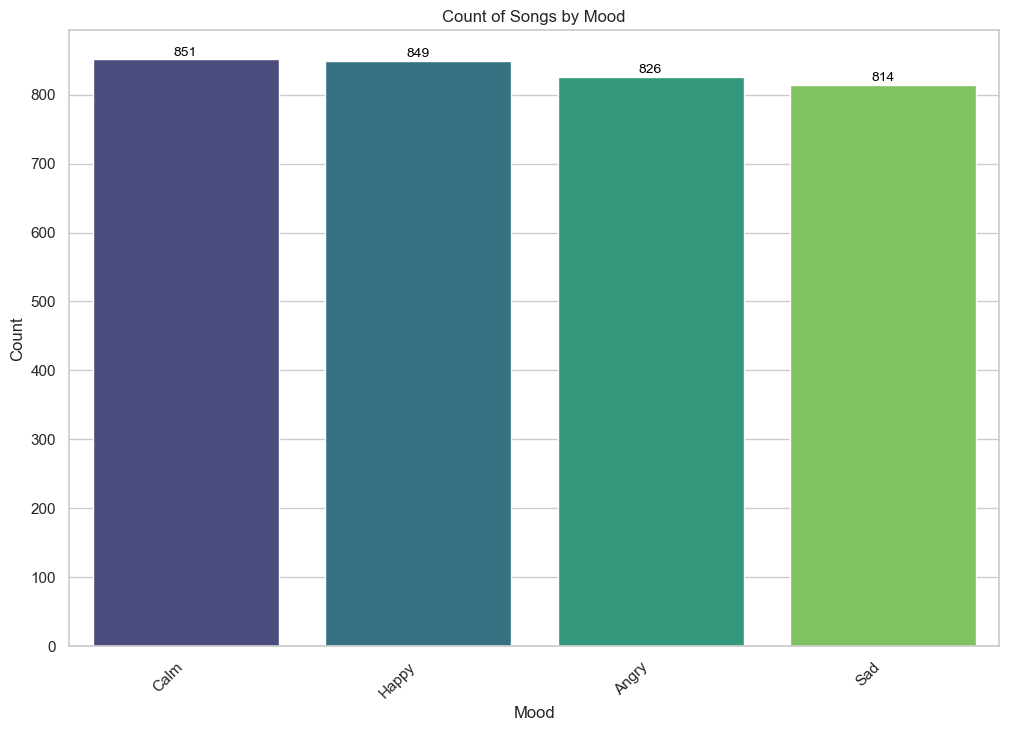

In [81]:
sns.set(style="whitegrid")

# Count plot with count labels
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=cleaned_df_small, x='mood', order=cleaned_df_small['mood'].value_counts().index, palette='viridis')

# Annotate count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Mood')
plt.ylabel('Count')
plt.title('Count of Songs by Mood')
plt.xticks(rotation=45, ha='right') 
plt.show()

### Verifying count plot with count on dataframe

In [82]:
cleaned_df_small.groupby('mood').count()

energy  liveness  tempo  speechiness  acousticness  instrumentalness  \
mood                                                                          
Angry     826       826    826          826           826               826   
Calm      851       851    851          851           851               851   
Happy     849       849    849          849           849               849   
Sad       814       814    814          814           814               814   

       danceability  duration_ms  loudness  valence  name  artist  track_link  \
mood                                                                            
Angry           826          826       826      826   826     826         826   
Calm            851          851       851      851   851     851         851   
Happy           849          849       849      849   849     849         849   
Sad             814          814       814      814   814     814         814   

        id  
mood        
Angry  826  
Calm   851  
Happy  849  
Sad    814

## 5.1.4 Feature scaling

In [108]:
data_small=cleaned_df_small.copy()
columns_to_drop = ['name', 'artist', 'id', 'track_link']
data_small = data_small.drop(columns=columns_to_drop)
#Label encode the 'mood' column
label_encoder = LabelEncoder()
data_small['mood_encoded'] = label_encoder.fit_transform(data_small['mood'])

# Extract features and target variable
X_small = data_small.drop(columns=['mood', 'mood_encoded'])
y_small = data_small['mood_encoded']

### Standard scaler

In [109]:
# Standardizing the features
scaler = StandardScaler()
scaled_features_small = scaler.fit_transform(X_small)

### Min Max Scaler

In [110]:
from sklearn.preprocessing import MinMaxScaler

features_min_max=X_small.copy()

columns_to_scale = ['loudness', 'tempo', 'duration_ms']  

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the specified columns and transform them
features_min_max[columns_to_scale] = scaler.fit_transform(features_min_max[columns_to_scale])

features_min_max


energy  liveness     tempo  speechiness  acousticness  instrumentalness  \
0      0.888    0.3060  0.674983       0.0987      0.000455          0.000000   
1      0.835    0.0795  0.397456       0.0911      0.058300          0.000003   
2      0.953    0.1050  0.514990       0.0750      0.000035          0.000020   
3      0.971    0.3370  0.590137       0.1070      0.000090          0.019700   
4      0.886    0.1130  0.814813       0.2500      0.000645          0.000000   
...      ...       ...       ...          ...           ...               ...   
3735   0.804    0.3300  0.679110       0.0358      0.004100          0.000000   
3736   0.924    0.2040  0.599228       0.0310      0.000972          0.007030   
3737   0.815    0.1760  0.571355       0.0858      0.060600          0.000000   
3738   0.627    0.2220  0.589992       0.0966      0.009740          0.000000   
3739   0.575    0.2520  0.552681       0.0801      0.374000          0.000000   

      danceability  duration_ms  loudness  valence  
0            0.426     0.105062  0.799447    0.387  
1            0.688     0.132926  0.789085    0.880  
2            0.503     0.111089  0.769909    0.224  
3            0.574     0.118104  0.795977    0.459  
4            0.358     0.120419  0.781630    0.238  
...            ...          ...       ...      ...  
3735         0.538     0.109438  0.764892    0.507  
3736         0.707     0.115710  0.820030    0.919  
3737         0.598     0.103155  0.781607    0.383  
3738         0.717     0.090239  0.694470    0.437  
3739         0.693     0.119248  0.722601    0.492  

[3340 rows x 10 columns]

## 5.1.5 Data visualization

### 3D scatter plot of different moods using valence and energy

In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    cleaned_df_small,
    x='valence',
    y='energy',
    z='mood',
    color='mood',
    size_max=10,  
    opacity=0.7,  
    symbol='mood', 
    width=800,
    height=600
)

# Customize layout
fig.update_layout(
    title='3D Scatter Plot of Valence, Energy, and Mood',
    scene=dict(
        zaxis=dict(showticklabels=False),
        xaxis_title='Valence',
        yaxis_title='Energy',
        zaxis_title='mood',
        camera=dict(
            eye=dict(x=1.2, y=1.2, z=0.9), 
        )
    )
)

fig.show()

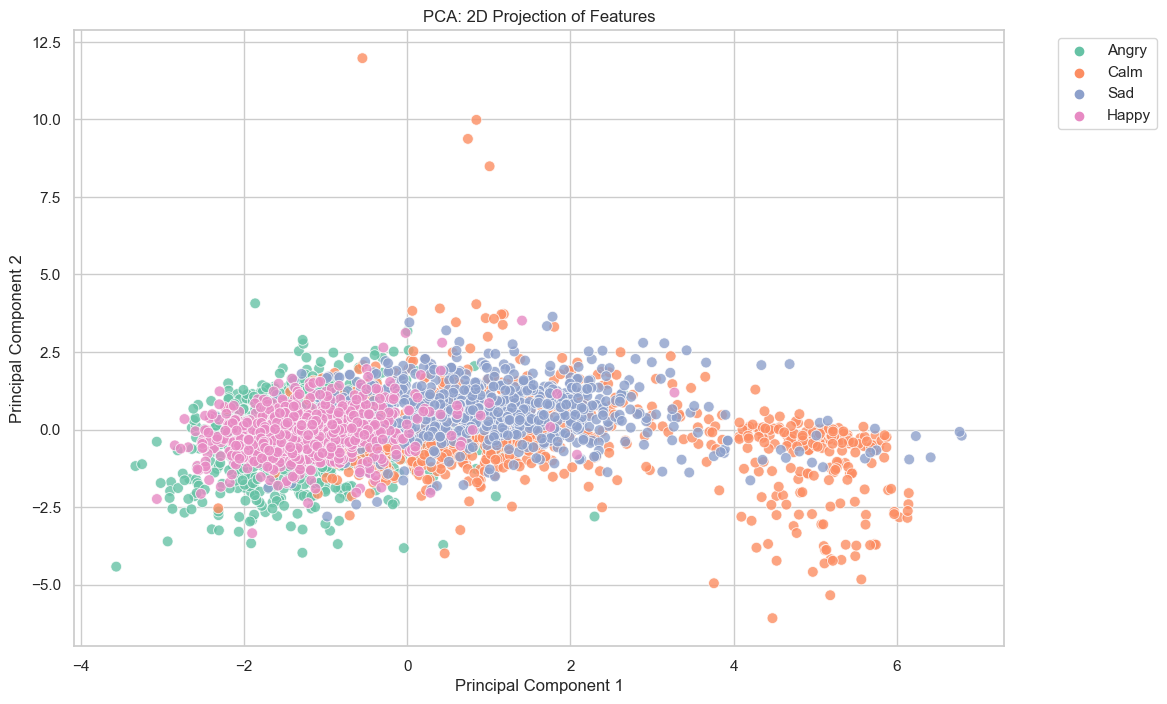

In [185]:
# Apply PCA
pca = PCA(n_components=5)
pca_features = pca.fit_transform(scaled_features_small)

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=target_small, palette='Set2', s=60, alpha=0.8)
plt.title("PCA: 2D Projection of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

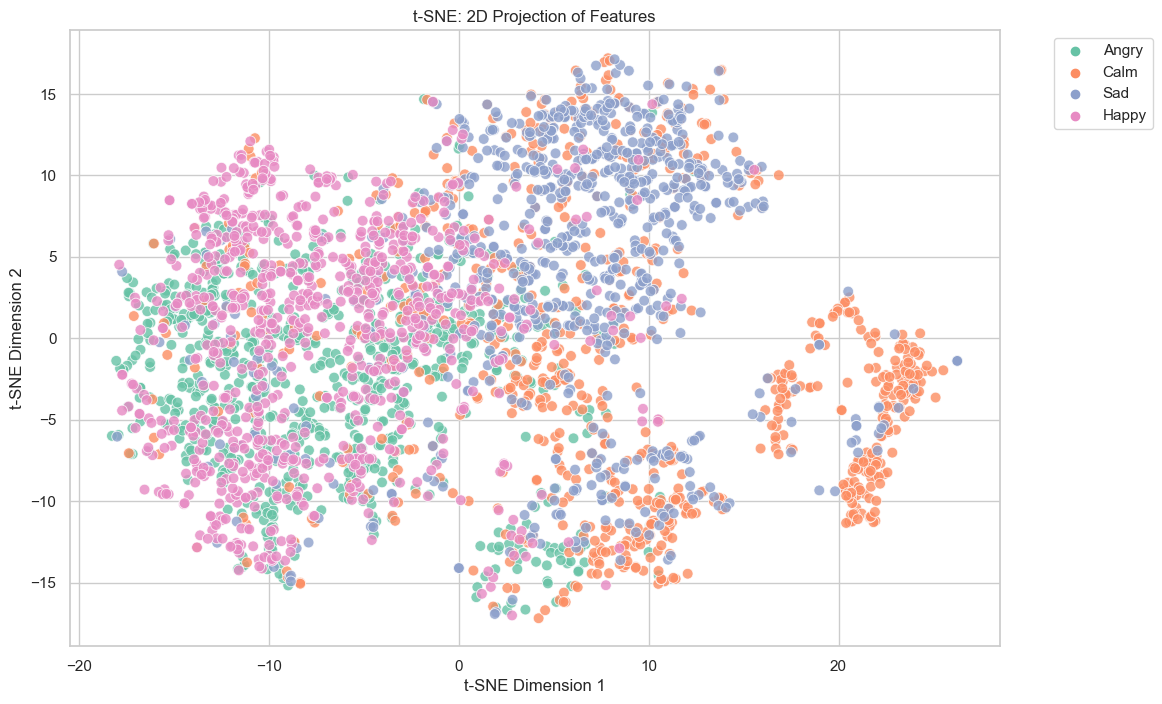

In [186]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(scaled_features_small)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=target_small, palette='Set2', s=60, alpha=0.8)
plt.title("t-SNE: 2D Projection of Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Feature Selection

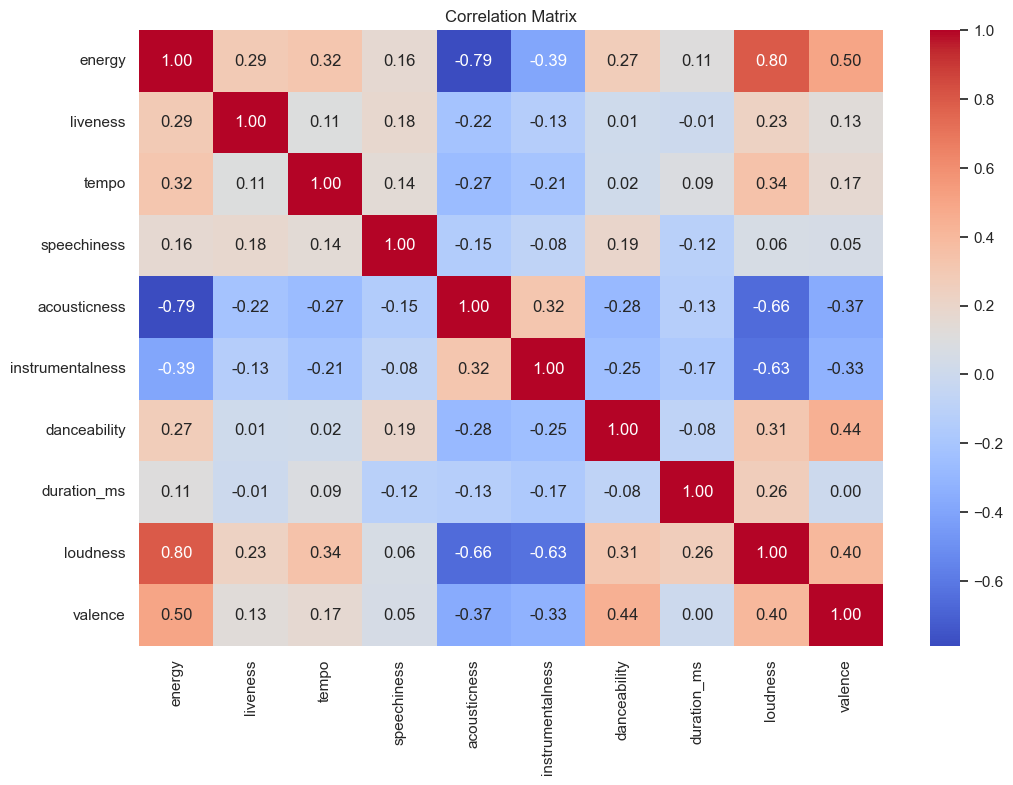

In [192]:
columns_to_drop = ['name', 'artist', 'id', 'track_link','mood']
data_small = cleaned_df_small.drop(columns=columns_to_drop)
correlation_matrix = data_small.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [193]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=5)
selector.fit(X_small, y_small)

feature_ranking = selector.ranking_

original_feature_names = list(X_small.columns)

# Dictionary that maps original feature names to their rankings
feature_ranking_dict = dict(zip(original_feature_names, feature_ranking))

print(feature_ranking_dict)

{'energy': 1, 'liveness': 6, 'tempo': 5, 'speechiness': 1, 'acousticness': 1, 'instrumentalness': 3, 'danceability': 4, 'duration_ms': 2, 'loudness': 1, 'valence': 1}


In [99]:
features_to_remove = ['liveness', 'tempo', 'danceability', 'instrumentalness', 'duration_ms']

red_features = X_small.drop(features_to_remove, axis=1)

red_features

energy  speechiness  acousticness  loudness  valence
0      0.888       0.0987      0.000455    -3.720    0.387
1      0.835       0.0911      0.058300    -4.162    0.880
2      0.953       0.0750      0.000035    -4.980    0.224
3      0.971       0.1070      0.000090    -3.868    0.459
4      0.886       0.2500      0.000645    -4.480    0.238
...      ...          ...           ...       ...      ...
3735   0.804       0.0358      0.004100    -5.194    0.507
3736   0.924       0.0310      0.000972    -2.842    0.919
3737   0.815       0.0858      0.060600    -4.481    0.383
3738   0.627       0.0966      0.009740    -8.198    0.437
3739   0.575       0.0801      0.374000    -6.998    0.492

[3340 rows x 5 columns]

In [196]:
from sklearn.feature_selection import VarianceThreshold
original_column_names = red_features.columns.tolist()

# Set the threshold value
threshold_value = 0.01

variance_selector = VarianceThreshold(threshold=threshold_value)

selected_features = variance_selector.fit_transform(data_small)

# Get the mask of selected features
selected_mask = variance_selector.get_support()

# Retrieve the original column names using the mask
selected_column_names = [col for col, mask in zip(original_column_names, selected_mask) if mask]

print("Selected Column Names:", selected_column_names)

Selected Column Names: ['energy', 'speechiness', 'acousticness', 'duration_ms', 'loudness', 'valence']


## Random Forest

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [ ]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 15)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt'])
}

# Define objective function
def objective(params):
    model = RandomForestClassifier(**params, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Evaluation  metrics
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(precision_score, average='weighted', zero_division=1)).mean()
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='weighted', zero_division=1)).mean()
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted', zero_division=1)).mean()
    
    combined_metric = -cv_results.mean() - precision - recall - f1  # Minimize the negative combined metric
    return combined_metric

# Choose Tree-structured Parzen Estimator optimization algorithm
algorithm = tpe.suggest

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=algorithm, max_evals=50, rstate=np.random.seed(42))

# Print the best hyperparameters
print("Best Hyperparameters:", best)

100%|██████████| 50/50 [14:57<00:00, 17.94s/trial, best loss: -2.8845216204004624]
Best Hyperparameters: {'max_depth': 24, 'max_features': 0, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 181}


Accuracy: 0.7036
Precision: 0.7108
Recall: 0.7036
F1 Score: 0.7047
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.77      0.79       190
        Calm       0.74      0.63      0.68       163
       Happy       0.65      0.75      0.69       165
         Sad       0.61      0.66      0.63       150

    accuracy                           0.70       668
   macro avg       0.70      0.70      0.70       668
weighted avg       0.71      0.70      0.70       668



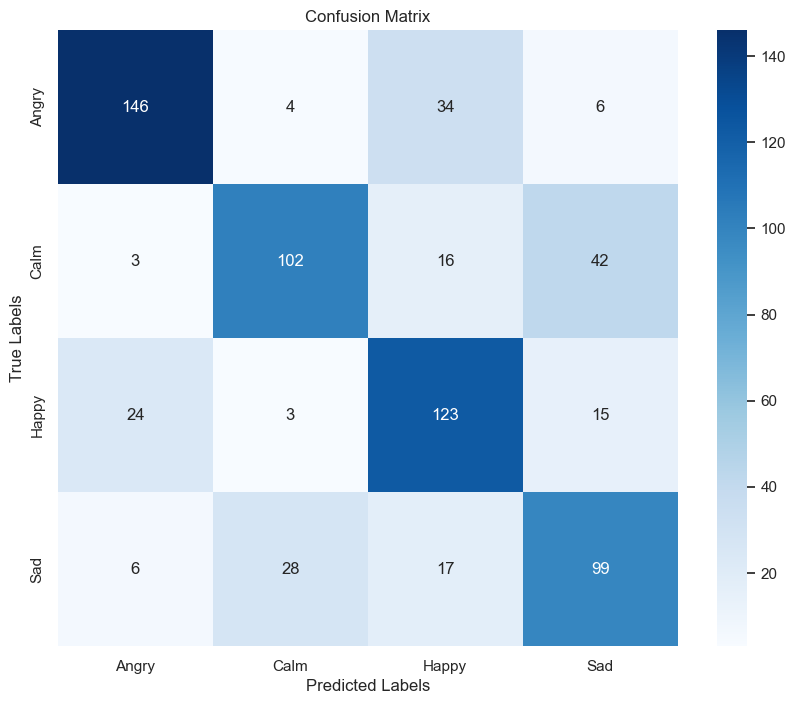

Class: Angry, AUC: 0.9315
Class: Calm, AUC: 0.8973
Class: Happy, AUC: 0.8915
Class: Sad, AUC: 0.8921


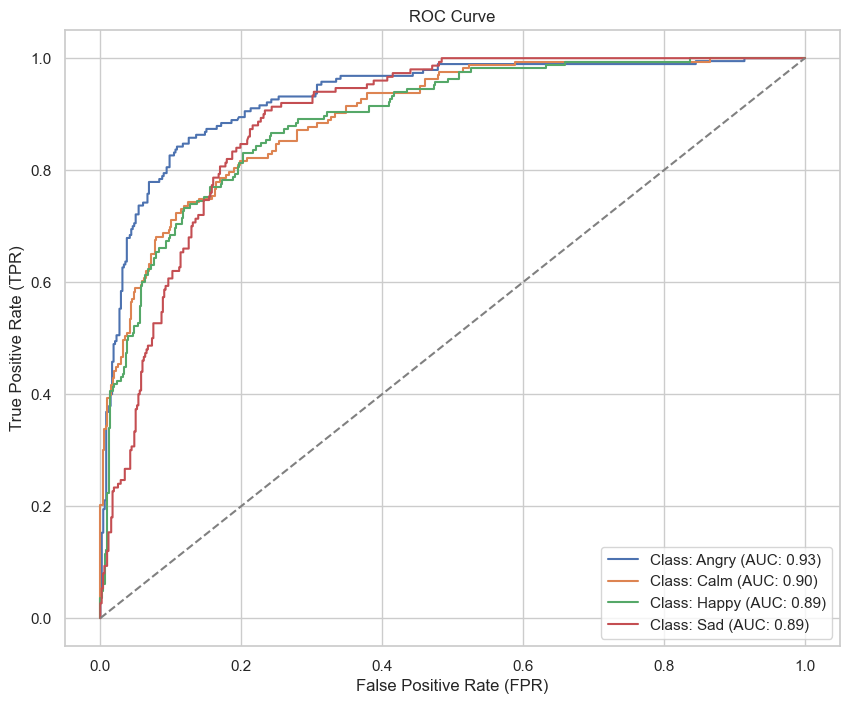

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

best_params = {
    'n_estimators': 181, 
    'max_depth': 24,     
    'min_samples_split': 2, 
    'min_samples_leaf':7, 
    'max_features': 'sqrt'  
}


# Create a Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

classes = label_encoder.classes_

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)

print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC Calculation
y_prob = best_rf_model .predict_proba(X_test)
fpr, tpr, auc_dict = dict(), dict(), dict()
class_names = np.unique(y_test)

for i, class_name in enumerate(class_names):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_test == class_name, y_prob[:, i])
    auc_dict[class_name] = roc_auc_score(y_test == class_name, y_prob[:, i])
    print(f"Class: {moods[class_name]}, AUC: {auc_dict[class_name]:.4f}")

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for class_name in class_names:
    plt.plot(fpr[class_name], tpr[class_name], label=f'Class: {moods[class_name]} (AUC: {auc_dict[class_name]:.2f})')

# Plot a diagonal which resembles a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.69906542 0.70654206 0.71535581 0.71535581 0.70786517]
Mean CV Accuracy: 0.7088368511323463
Standard Deviation of CV Accuracy: 0.006110394950225103


Accuracy: 0.7051
Precision: 0.7124
Recall: 0.7051
F1 Score: 0.7062
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.77      0.79       190
        Calm       0.75      0.63      0.68       163
       Happy       0.65      0.75      0.69       165
         Sad       0.61      0.66      0.63       150

    accuracy                           0.71       668
   macro avg       0.71      0.70      0.70       668
weighted avg       0.71      0.71      0.71       668



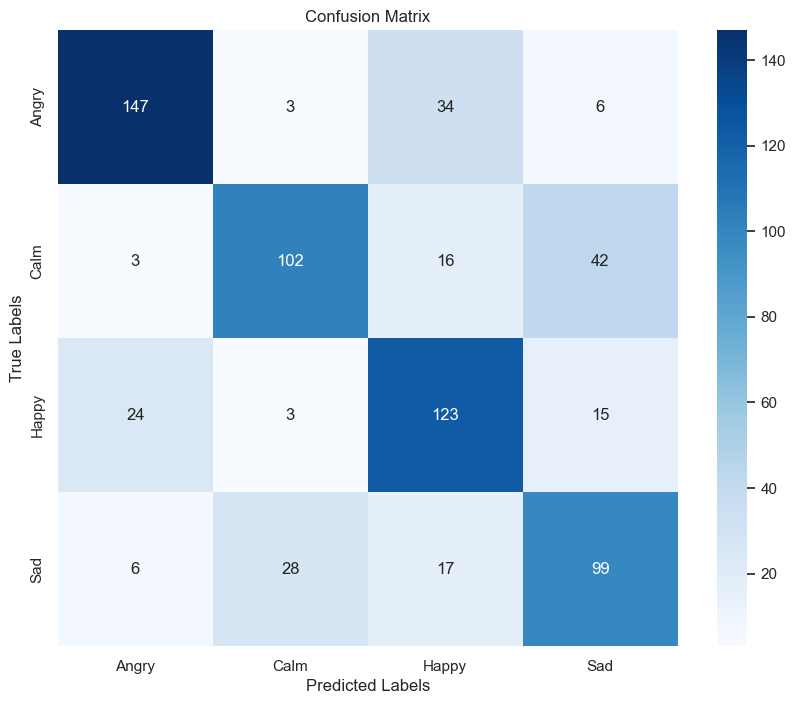

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#Using standard scaled features
X_train, X_test, y_train, y_test = train_test_split(scaled_features_small, y_small, test_size=0.2, random_state=42)
best_params = {
    'n_estimators': 181, 
    'max_depth': 24,     
    'min_samples_split': 2, 
    'min_samples_leaf': 7, 
    'max_features': 'sqrt'  
}
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [118]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.69906542 0.70654206 0.71722846 0.71535581 0.70973783]
Mean CV Accuracy: 0.7095859148027583
Standard Deviation of CV Accuracy: 0.006506445311023306


Accuracy: 0.7036
Precision: 0.7108
Recall: 0.7036
F1 Score: 0.7047
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.77      0.79       190
        Calm       0.74      0.63      0.68       163
       Happy       0.65      0.75      0.69       165
         Sad       0.61      0.66      0.63       150

    accuracy                           0.70       668
   macro avg       0.70      0.70      0.70       668
weighted avg       0.71      0.70      0.70       668



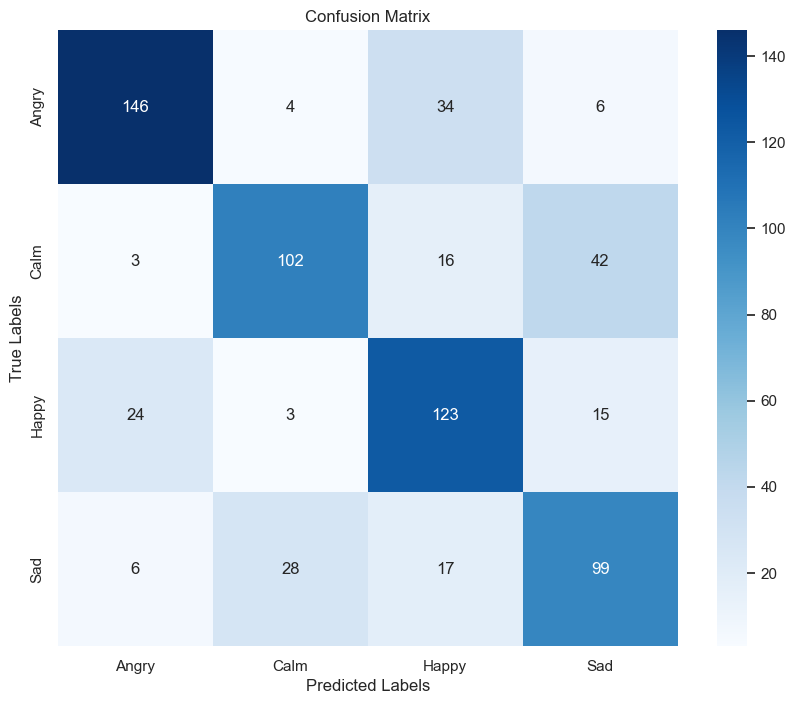

In [119]:
#Using min-max scaled features

X_train, X_test, y_train, y_test = train_test_split(features_min_max, y_small, test_size=0.2, random_state=42)
best_params = {
    'n_estimators': 181, 
    'max_depth': 24,     
    'min_samples_split': 2, 
    'min_samples_leaf':7, 
    'max_features': 'sqrt'  
}

best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

classes = label_encoder.classes_

class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [120]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.69906542 0.70654206 0.71535581 0.71535581 0.70786517]
Mean CV Accuracy: 0.7088368511323463
Standard Deviation of CV Accuracy: 0.006110394950225103


In [48]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import numpy as np


#Using reduced features subset from RFE
X_train, X_test, y_train, y_test = train_test_split(red_features, y_small, test_size=0.2, random_state=42)
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 15)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt'])
}
def objective(params):
    model = RandomForestClassifier(**params, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(precision_score, average='weighted', zero_division=1)).mean()
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='weighted', zero_division=1)).mean()
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted', zero_division=1)).mean()
    
    combined_metric = -cv_results.mean() - precision - recall - f1 
    return combined_metric
algorithm = tpe.suggest
best = fmin(fn=objective, space=space, algo=algorithm, max_evals=50, rstate=np.random.seed(42))
print("Best Hyperparameters:", best)

100%|██████████| 50/50 [17:48<00:00, 21.37s/trial, best loss: -2.858314106442764] 
Best Hyperparameters: {'max_depth': 4, 'max_features': 0, 'min_samples_leaf': 8, 'min_samples_split': 1, 'n_estimators': 149}


Accuracy: 0.6751
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.75      0.78       190
        Calm       0.67      0.57      0.62       163
       Happy       0.61      0.72      0.66       165
         Sad       0.60      0.65      0.63       150

    accuracy                           0.68       668
   macro avg       0.68      0.67      0.67       668
weighted avg       0.68      0.68      0.68       668



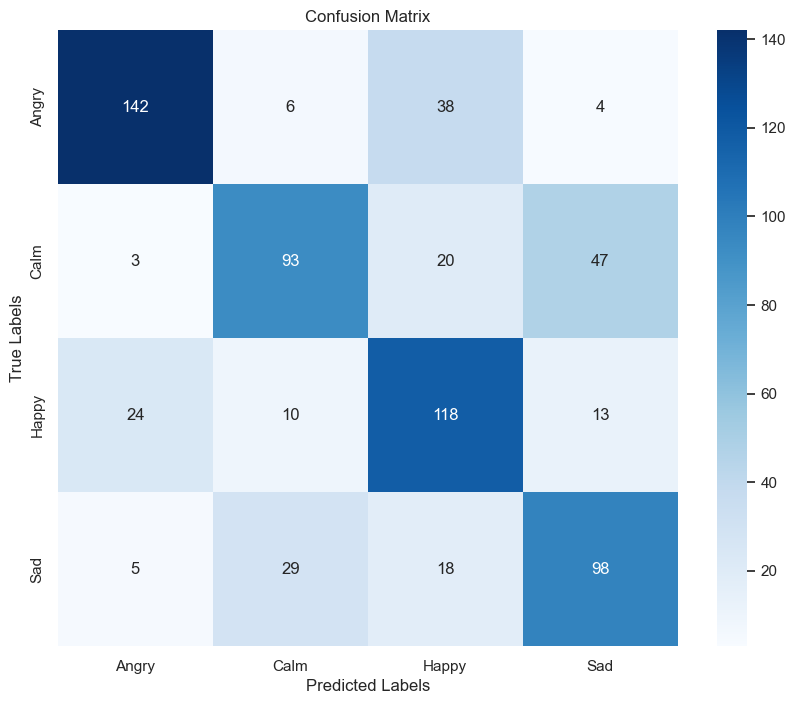

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(red_features, y_small, test_size=0.2, random_state=42)
best_params = {
    'n_estimators': 178, 
    'max_depth': 9,     
    'min_samples_split': 8, 
    'min_samples_leaf':5, 
    'max_features': 'sqrt'  
}

best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [122]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.68037383 0.65607477 0.69850187 0.68539326 0.69850187]
Mean CV Accuracy: 0.683769120375232
Standard Deviation of CV Accuracy: 0.01559006756493051


In [123]:
X_train, X_test, y_train, y_test = train_test_split(red_features, y_small, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [274]:
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 15)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt'])
}
def objective(params):
    model = RandomForestClassifier(**params, random_state=42)
    
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    precision = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=make_scorer(precision_score, average='weighted', zero_division=1)).mean()
    recall = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=make_scorer(recall_score, average='weighted', zero_division=1)).mean()
    f1 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted', zero_division=1)).mean()
    combined_metric = -cv_results.mean() - precision - recall - f1 
    return combined_metric

algorithm = tpe.suggest
best = fmin(fn=objective, space=space, algo=algorithm, max_evals=50, rstate=np.random.seed(42))

print("Best Hyperparameters:", best)

100%|██████████| 50/50 [18:04<00:00, 21.70s/trial, best loss: -2.7491175105773187]
Best Hyperparameters: {'max_depth': 26, 'max_features': 0, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 113}


Accuracy: 0.6781
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.75      0.78       190
        Calm       0.67      0.58      0.62       163
       Happy       0.61      0.71      0.65       165
         Sad       0.62      0.65      0.63       150

    accuracy                           0.68       668
   macro avg       0.68      0.67      0.67       668
weighted avg       0.68      0.68      0.68       668



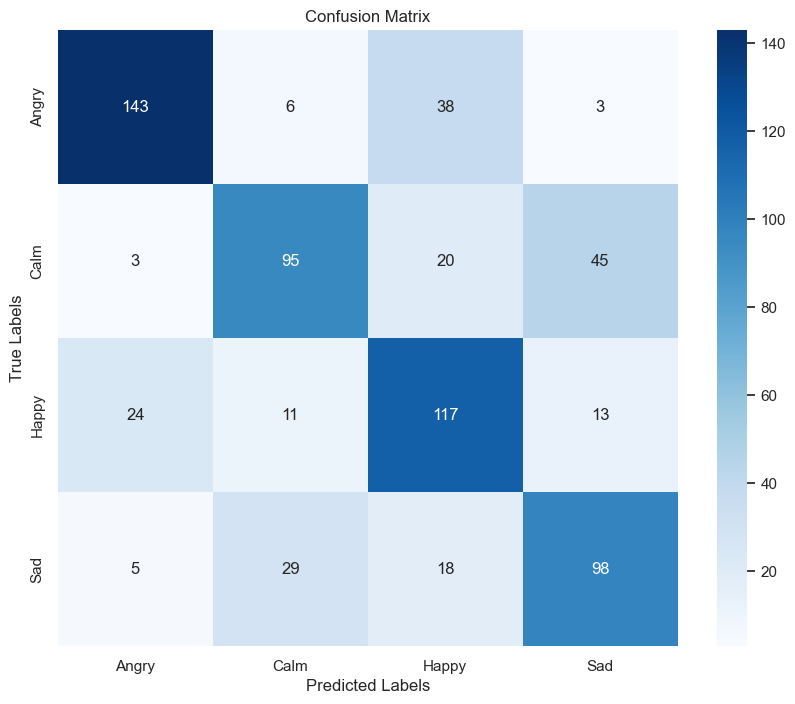

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

best_params = {
    'n_estimators': 117, 
    'max_depth': 9,     
    'min_samples_split': 8, 
    'min_samples_leaf':5, 
    'max_features': 'sqrt'  
}
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

best_rf_model.fit(X_train_scaled, y_train)
y_pred = best_rf_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [125]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.68037383 0.65233645 0.6928839  0.67977528 0.6928839 ]
Mean CV Accuracy: 0.6796506703069761
Standard Deviation of CV Accuracy: 0.014811088254144587


In [127]:

featuresred_min_max=red_features.copy()

columns_to_scale = ['loudness'] 
scaler = MinMaxScaler()
featuresred_min_max[columns_to_scale] = scaler.fit_transform(featuresred_min_max[columns_to_scale])

X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(featuresred_min_max, y_small, test_size=0.2, random_state=42)

featuresred_min_max


energy  speechiness  acousticness  loudness  valence
0      0.888       0.0987      0.000455  0.799447    0.387
1      0.835       0.0911      0.058300  0.789085    0.880
2      0.953       0.0750      0.000035  0.769909    0.224
3      0.971       0.1070      0.000090  0.795977    0.459
4      0.886       0.2500      0.000645  0.781630    0.238
...      ...          ...           ...       ...      ...
3735   0.804       0.0358      0.004100  0.764892    0.507
3736   0.924       0.0310      0.000972  0.820030    0.919
3737   0.815       0.0858      0.060600  0.781607    0.383
3738   0.627       0.0966      0.009740  0.694470    0.437
3739   0.575       0.0801      0.374000  0.722601    0.492

[3340 rows x 5 columns]

In [286]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 15)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt'])
}

def objective(params):
    model = RandomForestClassifier(**params, random_state=42)
    
    cv_results = cross_val_score(model, X_train_minmax, y_train, cv=5, scoring='accuracy')
    precision = cross_val_score(model, X_train_minmax, y_train, cv=5, scoring=make_scorer(precision_score, average='weighted', zero_division=1)).mean()
    recall = cross_val_score(model, X_train_minmax, y_train, cv=5, scoring=make_scorer(recall_score, average='weighted', zero_division=1)).mean()
    f1 = cross_val_score(model, X_train_minmax, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted', zero_division=1)).mean()

    combined_metric = -cv_results.mean() - precision - recall - f1 
    return combined_metric

algorithm = tpe.suggest

best = fmin(fn=objective, space=space, algo=algorithm, max_evals=50, rstate=np.random.seed(42))

print("Best Hyperparameters:", best)

100%|██████████| 50/50 [16:32<00:00, 19.85s/trial, best loss: -2.7595509331604395]
Best Hyperparameters: {'max_depth': 15, 'max_features': 0, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 41}


Accuracy: 0.6781
Precision: 0.6880
Recall: 0.6781
F1 Score: 0.6793
Classification Report:
              precision    recall  f1-score   support

       Angry       0.83      0.73      0.78       190
        Calm       0.68      0.57      0.62       163
       Happy       0.61      0.74      0.67       165
         Sad       0.61      0.66      0.63       150

    accuracy                           0.68       668
   macro avg       0.68      0.68      0.67       668
weighted avg       0.69      0.68      0.68       668



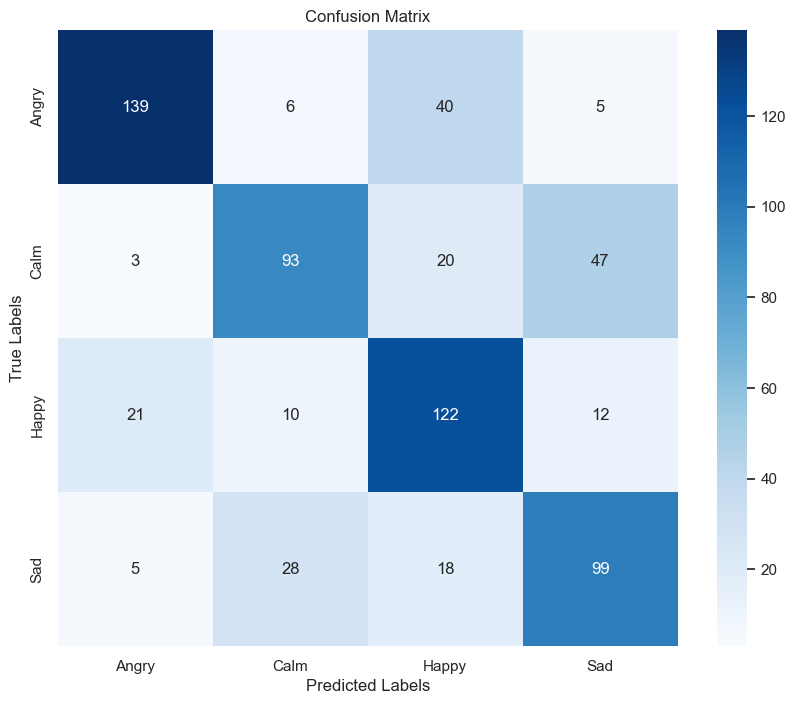

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

best_params = {
    'n_estimators': 41, 
    'max_depth': 7,     
    'min_samples_split': 6, 
    'min_samples_leaf':5, 
    'max_features': 'sqrt'  
}

best_rf_model = RandomForestClassifier(**best_params, random_state=42)

best_rf_model.fit(X_train_minmax, y_train)

y_pred = best_rf_model.predict(X_test_minmax)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [129]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.69345794 0.65046729 0.70037453 0.68913858 0.69101124]
Mean CV Accuracy: 0.6848899156428297
Standard Deviation of CV Accuracy: 0.017627383847509434


## XGBoost Model

In [130]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [333]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Hyperparameter search space
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', range(3, 15)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1), 
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)  
}

# Objective function
def objective(params):
    clf = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return -score  # Minimize negative cross-validation score

trials = Trials()

# Hyperparameter optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=300, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 300/300 [11:17<00:00,  2.26s/trial, best loss: -0.7211908012181036]
Best hyperparameters: {'colsample_bytree': 0.5138454323325371, 'gamma': 1.2264826277100878, 'learning_rate': 0.08471109978692902, 'max_depth': 8, 'min_child_weight': 4.889798943783427, 'n_estimators': 69, 'reg_alpha': 0.31928270202214637, 'reg_lambda': 0.9980577759334517, 'subsample': 0.5289300742285952}


Accuracy: 0.7186
Precision: 0.7271
Recall: 0.7186
F1 Score: 0.7191
Classification Report:
              precision    recall  f1-score   support

       Angry       0.81      0.76      0.79       190
        Calm       0.77      0.62      0.69       163
       Happy       0.66      0.78      0.71       165
         Sad       0.64      0.71      0.67       150

    accuracy                           0.72       668
   macro avg       0.72      0.72      0.72       668
weighted avg       0.73      0.72      0.72       668



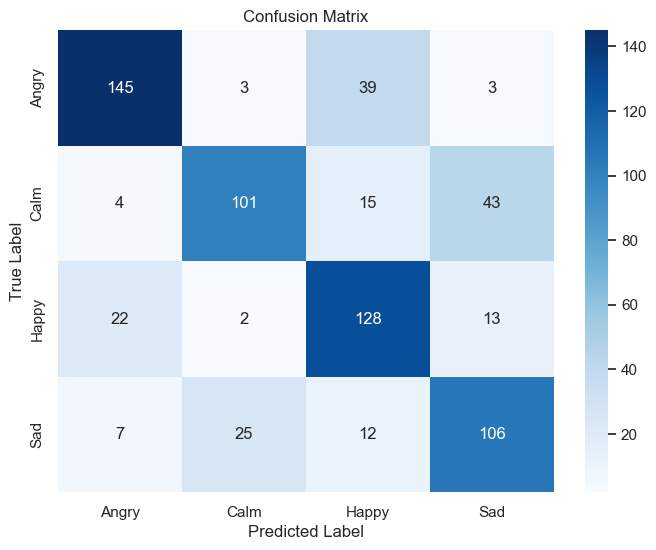

Class: Angry, AUC: 0.9387
Class: Calm, AUC: 0.8891
Class: Happy, AUC: 0.8996
Class: Sad, AUC: 0.8957


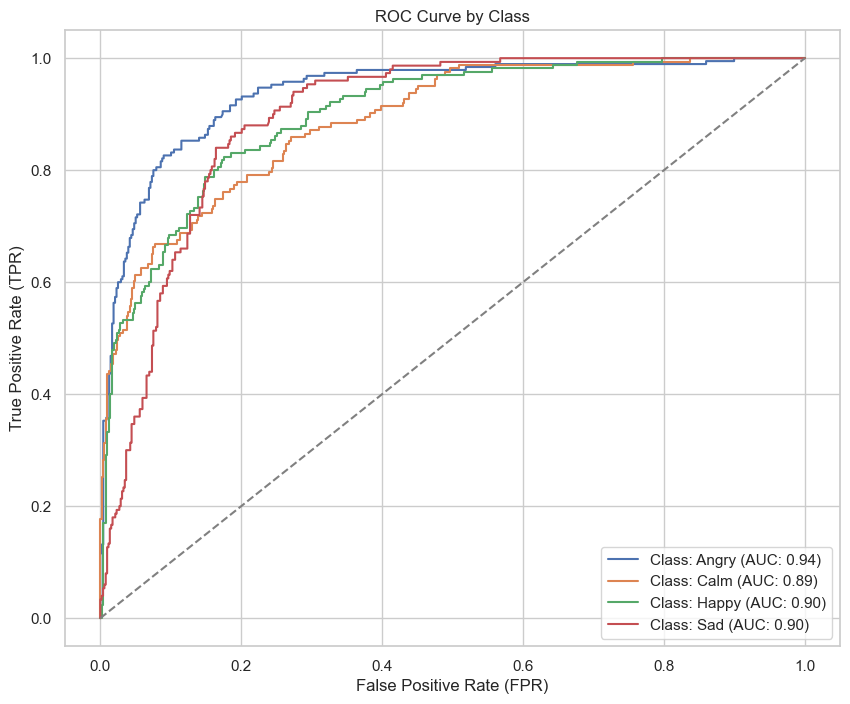

In [135]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Creating XGBoost classifier with the best parameters
xgb_model1 = XGBClassifier(colsample_bytree= 0.5138454323325371, gamma=  1.2264826277100878, learning_rate=0.08471109978692902, max_depth= 9, min_child_weight= 4.889798943783427, n_estimators= 69, subsample= 0.6139366519403486)

#Training the classifier
xgb_model1.fit(X_train, y_train)

#Making predictions on the test set
y_pred = xgb_model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Get the original labels after making predictions
original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
classes = label_encoder.classes_ 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
y_prob = xgb_model1.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, auc_dict = dict(), dict(), dict()
class_names = np.unique(y_test)  

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve(y_test == class_name, y_prob[:, i])
    auc = roc_auc_score(y_test == class_name, y_prob[:, i])
    auc_dict[class_name] = auc
    print(f"Class: {label_encoder.inverse_transform([class_name])[0]}, AUC: {auc:.4f}")

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f'Class: {label_encoder.inverse_transform([class_name])[0]} (AUC: {auc_dict[class_name]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve by Class')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get feature importance of the optimized XGBoost
importance = xgb_model1.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, importance))

# Arrange the feature importance dictionary by importance score
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance_score in sorted_feature_importance:
    print(f"{feature}: {importance_score}")

Feature Importance:
tempo: 0.19599777460098267
speechiness: 0.16528110206127167
danceability: 0.1645163595676422
energy: 0.15735982358455658
liveness: 0.12227030098438263
acousticness: 0.10552450269460678
instrumentalness: 0.08905018121004105


In [351]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Define list of features
all_features = ['energy', 'valence', 'instrumentalness', 'acousticness', 'speechiness', 'danceability', 'duration_ms', 'tempo', 'loudness', 'liveness']

# Initialize variables to store best subset of features and accuracy
best_subset = None
best_accuracy = 0

# Iterate over different combinations of features
for num_features in range(1, len(all_features) + 1):
    for feature_combination in combinations(all_features, num_features):
        xgb_model1.fit(X_train[list(feature_combination)], y_train)
        scores = cross_val_score(xgb_model1, X_train[list(feature_combination)], y_train, cv=5)
        accuracy = scores.mean()
        
        # Check if the current subset of features improves accuracy of the classifier
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_subset = feature_combination

# Train the XGBoost model with the best subset of features retrieved
xgb_model1.fit(X_train[list(best_subset)], y_train)

test_accuracy = xgb_model1.score(X_test[list(best_subset)], y_test)
print("Best subset of features:", best_subset)
print("Best accuracy on training set:", best_accuracy)
print("Accuracy on test set with best subset of features:", test_accuracy)

Best subset of features: ('valence', 'instrumentalness', 'acousticness', 'speechiness', 'duration_ms', 'tempo', 'loudness')
Best accuracy on training set: 0.7196800728061886
Accuracy on test set with best subset of features: 0.7080838323353293


In [430]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model1, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.69719626 0.70654206 0.71161049 0.71910112 0.73595506]
Mean CV Accuracy: 0.7140809968847351
Standard Deviation of CV Accuracy: 0.01305150928633813


In [136]:
red_features_xgb=X_small.drop(["liveness", "danceability", "energy"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(red_features_xgb, y_small, test_size=0.2, random_state=42)

In [360]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', range(3, 15)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1), 
    'reg_lambda': hp.uniform('reg_lambda', 0, 1) 
}

def objective(params):
    clf = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return -score 

trials = Trials()

best = fmin(objective, space, algo=tpe.suggest, max_evals=300, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 300/300 [08:59<00:00,  1.80s/trial, best loss: -0.7151954916167874]
Best hyperparameters: {'colsample_bytree': 0.5517323127043594, 'gamma': 0.669383803592627, 'learning_rate': 0.02654732774662788, 'max_depth': 3, 'min_child_weight': 7.280773229689598, 'n_estimators': 99, 'reg_alpha': 0.43112411322111455, 'reg_lambda': 0.5690593663172236, 'subsample': 0.6937034071742549}


Accuracy: 0.7036
Classification Report:
              precision    recall  f1-score   support

       Angry       0.83      0.75      0.79       190
        Calm       0.75      0.61      0.67       163
       Happy       0.64      0.76      0.70       165
         Sad       0.61      0.68      0.64       150

    accuracy                           0.70       668
   macro avg       0.71      0.70      0.70       668
weighted avg       0.71      0.70      0.70       668



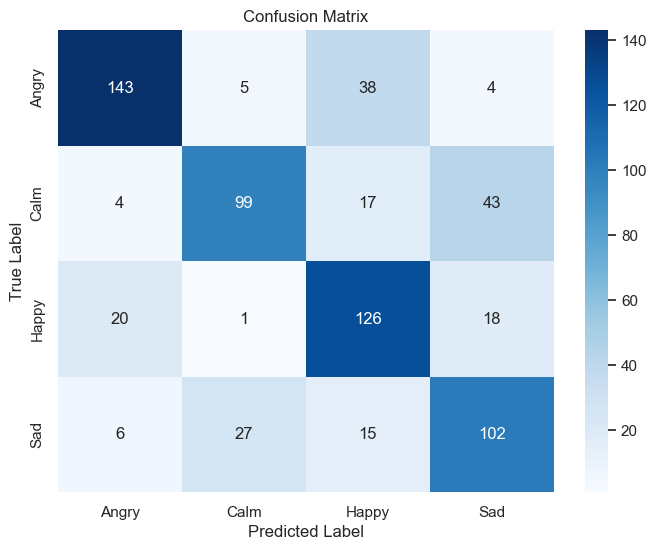

In [137]:
xgb_model2 = XGBClassifier(colsample_bytree= 0.5517323127043594, gamma = 0.669383803592627, learning_rate= 0.02654732774662788, max_depth= 12, min_child_weight= 7.280773229689598,  n_estimators= 110, subsample= 0.6937034071742549)

xgb_model2.fit(X_train, y_train)

y_pred = xgb_model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

classes = label_encoder.classes_

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [138]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgb_model2, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.7046729  0.71775701 0.70599251 0.71910112 0.71722846]
Mean CV Accuracy: 0.7129504007840667
Standard Deviation of CV Accuracy: 0.00626364149847033


In [140]:
# Reduced feature subset from RFE
X_train, X_test, y_train, y_test = train_test_split(red_features, y_small, test_size=0.2, random_state=42)

In [397]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', range(3, 15)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1), 
    'reg_lambda': hp.uniform('reg_lambda', 0, 1) 
}

def objective(params):
    clf = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return -score 

trials = Trials()

best = fmin(objective, space, algo=tpe.suggest, max_evals=300, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 300/300 [07:30<00:00,  1.50s/trial, best loss: -0.6882565018026532]
Best hyperparameters: {'colsample_bytree': 0.7324413465246926, 'gamma': 1.0963950542692797, 'learning_rate': 0.029442392250414177, 'max_depth': 10, 'min_child_weight': 9.253697766079123, 'n_estimators': 166, 'reg_alpha': 0.6042631593450805, 'reg_lambda': 0.31145958768681076, 'subsample': 0.540826745523899}


Accuracy: 0.6781
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.76      0.79       190
        Calm       0.68      0.57      0.62       163
       Happy       0.60      0.70      0.65       165
         Sad       0.61      0.67      0.64       150

    accuracy                           0.68       668
   macro avg       0.68      0.67      0.67       668
weighted avg       0.69      0.68      0.68       668



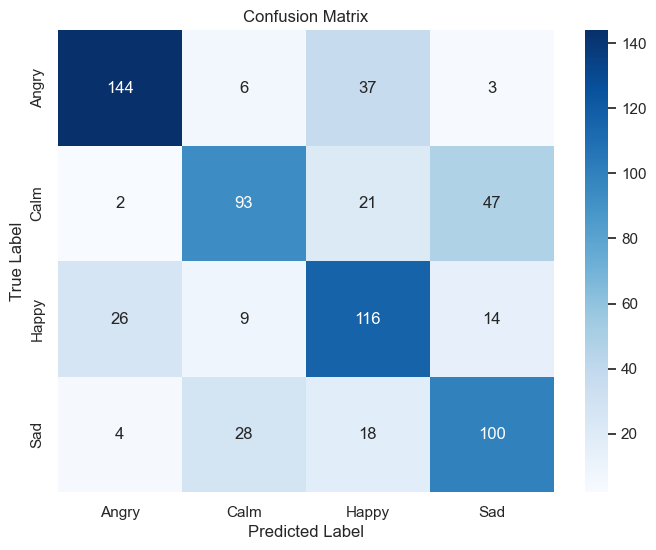

In [141]:
xgb_model3 = XGBClassifier(colsample_bytree=  0.9059604325783674, gamma= 2.823019015472432, learning_rate= 0.029442392250414177, max_depth= 25, min_child_weight= 9.253697766079123, n_estimators= 175, subsample= 0.540826745523899)

xgb_model3.fit(X_train, y_train)

y_pred = xgb_model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

classes = label_encoder.classes_

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [142]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model3, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.67663551 0.65981308 0.68164794 0.6741573  0.70599251]
Mean CV Accuracy: 0.679649270187966
Standard Deviation of CV Accuracy: 0.015037816566036763


## MLP

In [272]:
#Using scaled full feature set for training and testing 
X_train, X_test, y_train, y_test = train_test_split(scaled_features_small, y_small, test_size=0.2, random_state=42)

Fold 1:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.6926
Validation accuracy: 0.6841317415237427
Fold 2:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7222 - loss: 0.6662 
Validation accuracy: 0.7290419340133667
Fold 3:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.6824 
Validation accuracy: 0.720059871673584
Fold 4:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - loss: 0.5843 
Validation accuracy: 0.7305389046669006
Fold 5:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.5546 
Validation accuracy: 0.7634730339050293
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7544 - loss: 0.6294 
Test accuracy: 0.7514970302581787
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.81      0.81       190
        Calm       0.80      0.63      0.71       163
       Happy       0.73      0.79      0.76       165
    

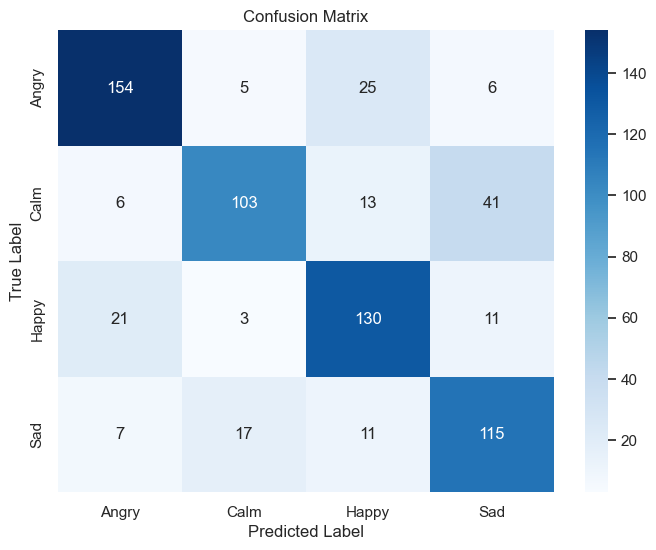

In [257]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model_test_small = keras.Sequential([
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(), 
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),  
    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(), 
    layers.Dense(128, activation='tanh'),
    layers.BatchNormalization(), 
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(),  
    layers.Dense(4, activation='softmax') 
])

# Compile the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model_test_small.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold_num, (train_indices, val_indices) in enumerate(k_fold.split(scaled_features_small)):
    print(f"Fold {fold_num + 1}:")

    X_train, X_val = scaled_features_small[train_indices], scaled_features_small[val_indices]
    y_train, y_val = y_small[train_indices], y_small[val_indices]

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model_test_small.fit(X_train, y_train, epochs=1000, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    val_loss, val_acc = model_test_small.evaluate(X_val, y_val)
    print(f'Validation accuracy: {val_acc}')

test_loss, test_acc = model_test_small.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

predictions = model_test_small.predict(X_test)
predicted_labelsnp = np.argmax(predictions, axis=1)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(predicted_labelsnp)

# Generate and print classification report
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)  # Use encoded labels
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Class: 0, AUC: 0.9502
Class: 1, AUC: 0.9229
Class: 2, AUC: 0.9295
Class: 3, AUC: 0.9258


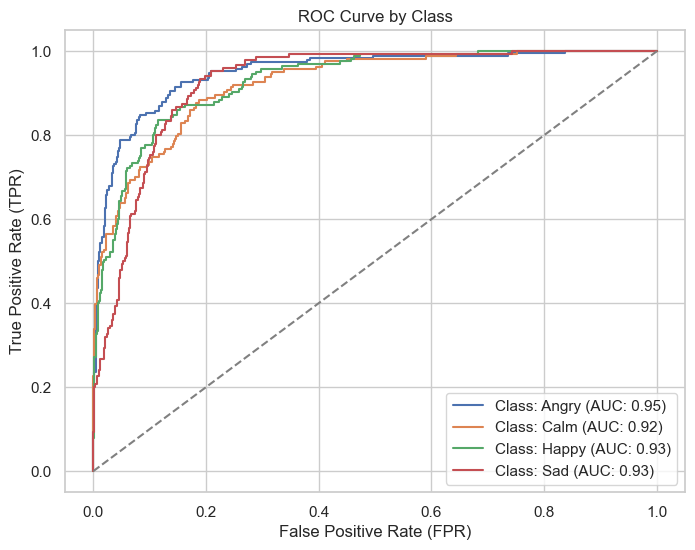

In [273]:
y_prob = model_test_small.predict(X_test)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
auc_dict = {}

class_names = np.unique(y_test) 

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve((y_test == class_name), y_prob[:, i], pos_label=1)
    auc = roc_auc_score((y_test == class_name), y_prob[:, i])
    auc_dict[class_name] = auc
    print(f"Class: {class_name}, AUC: {auc:.4f}")

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f'Class: {label_encoder.inverse_transform([class_name])[0]} (AUC: {auc_dict[class_name]:.2f})')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve by Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [274]:
red_features_scaled = scaler.fit_transform(red_features)
X_train, X_test, y_train, y_test = train_test_split(red_features_scaled, y_small, test_size=0.2, random_state=42)

Fold 1:


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.7390 
Validation accuracy: 0.658682644367218
Fold 2:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - loss: 0.6751 
Validation accuracy: 0.6646706461906433
Fold 3:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6989 - loss: 0.7550 
Validation accuracy: 0.6781437397003174
Fold 4:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7085 - loss: 0.6964 
Validation accuracy: 0.682634711265564
Fold 5:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7274 - loss: 0.6543 
Validation accuracy: 0.6946107745170593
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7086 - loss: 0.7234
Test accuracy: 0.6991018056869507
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

       Angry       0.81      0.79      0.80       190
        Calm       0.75      0.58      0.65       163
       Happy       0.66      0.69      0.67       165
         Sad 

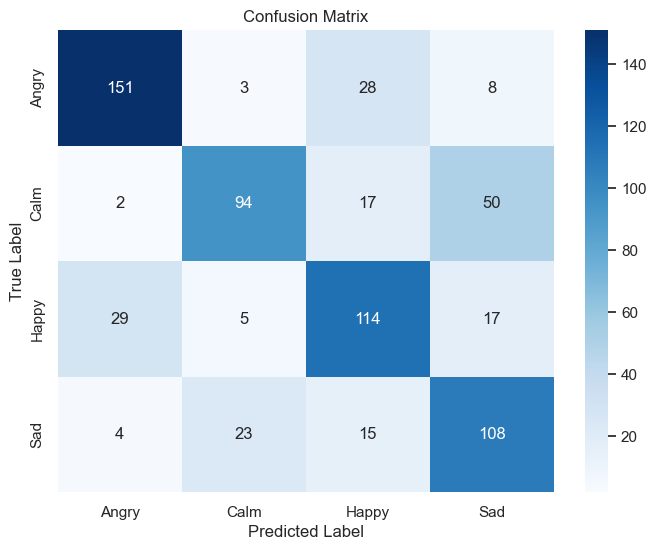

In [275]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Define your model
model_test_small_red = keras.Sequential([
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(), 
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(), 
    layers.Dense(128, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(), 
    layers.Dense(4, activation='softmax') 
])

# Compile the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model_test_small_red.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold_num, (train_indices, val_indices) in enumerate(k_fold.split(red_features_scaled)):
    print(f"Fold {fold_num + 1}:")

    X_train, X_val = red_features_scaled[train_indices], red_features_scaled[val_indices]
    y_train, y_val = y_small[train_indices], y_small[val_indices]

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model_test_small_red.fit(X_train, y_train, epochs=1000, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    val_loss, val_acc = model_test_small_red.evaluate(X_val, y_val)
    print(f'Validation accuracy: {val_acc}')

test_loss, test_acc = model_test_small_red.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

predictions = model_test_small_red.predict(X_test)
predicted_labels1 = np.argmax(predictions, axis=1)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(predicted_labels1)
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels) 
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [165]:
model_test_small.save("mlp_mood_predictor_small.keras")

## SVM model

In [340]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_small, y_small, test_size=0.2, random_state=42)

KeyboardInterrupt: 

In [169]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

# Define search space of parameters
space = {
    'C': hp.uniform('C', 0.1, 10.0),
    'gamma': hp.choice('gamma', ['auto', 'scale', hp.uniform('gamma_val', 0.01, 1.0)]),
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
}

# Objective function to minimize
def objective(params):
    svm_classifier = SVC(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    return -mean_cv_score  # Minimize negative cross-validation score

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 100/100 [03:43<00:00,  2.23s/trial, best loss: -0.6976099968497322]
Best hyperparameters: {'C': 3.4404206161165742, 'class_weight': 1, 'gamma': 0}


Accuracy: 0.6991017964071856
Classification Report:
              precision    recall  f1-score   support

       Angry       0.83      0.72      0.77       190
        Calm       0.76      0.55      0.64       163
       Happy       0.63      0.80      0.71       165
         Sad       0.61      0.73      0.67       150

    accuracy                           0.70       668
   macro avg       0.71      0.70      0.70       668
weighted avg       0.72      0.70      0.70       668



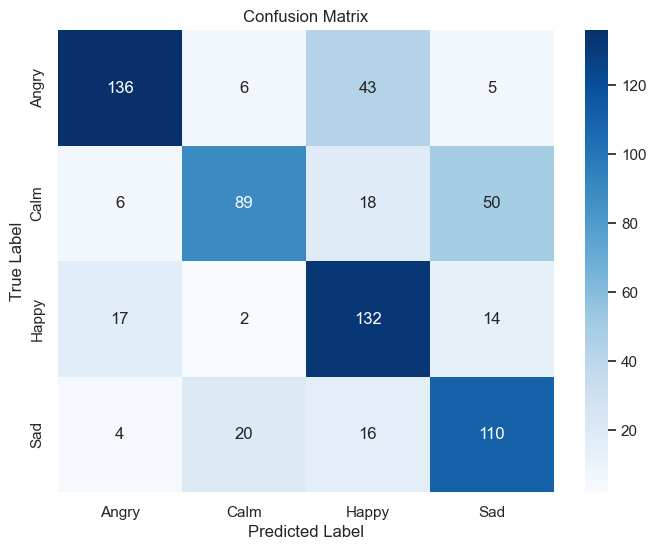

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

class_weights = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}
# Create SVM classifier
svm_classifier = SVC(C=3.4404206161165742, class_weight=class_weights, gamma='scale', kernel="rbf", max_iter=5000)
# Classifier only converges to an optimal solution after 5000 max iterations

svm_classifier.fit(X_train, y_train)

y_pred_test = svm_classifier.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy_test)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred_test)
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels) 
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Class: 0, AUC: 0.9108
Class: 1, AUC: 0.8684
Class: 2, AUC: 0.8826
Class: 3, AUC: 0.8767


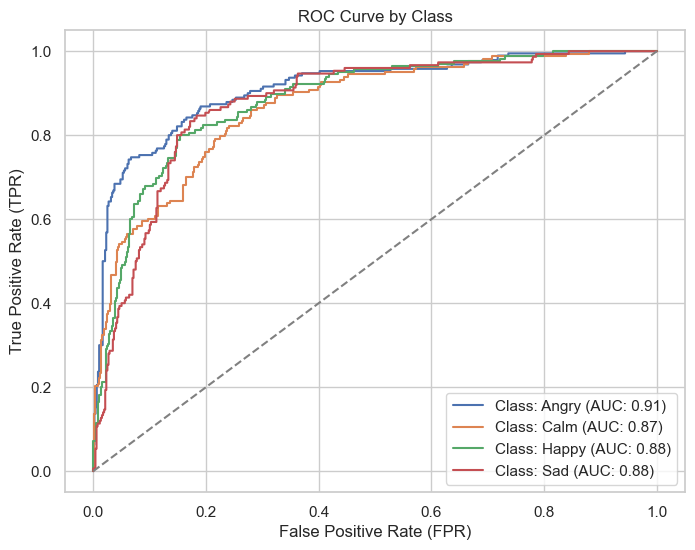

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probability estimates for each class from the SVC 
y_prob = svm_classifier.decision_function(X_test)

# Compute ROC curves for each class
fpr = dict()
tpr = dict()
auc_dict = {}

class_names = np.unique(y_test)

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve((y_test == class_name), y_prob[:, i], pos_label=1)
    auc = roc_auc_score((y_test == class_name), y_prob[:, i])
    auc_dict[class_name] = auc

    print(f"Class: {class_name}, AUC: {auc:.4f}")

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f'Class: {label_encoder.inverse_transform([class_name])[0]} (AUC: {auc_dict[class_name]:.2f})')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve by Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation Scores: [0.68785047 0.69345794 0.70786517 0.69662921 0.70037453]
Mean Cross-Validation Score: 0.6972354650145263
Standard Deviation of Cross-Validation Scores: 0.006716542657108712


In [185]:
X_train, X_test, y_train, y_test = train_test_split(red_features_scaled, y_small, test_size=0.2, random_state=42)

In [186]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

space = {
    'C': hp.uniform('C', 0.1, 10.0),  # Regularization parameter
    'gamma': hp.choice('gamma', ['auto', 'scale', hp.uniform('gamma_val', 0.01, 1.0)]),
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
}

def objective(params):
    svm_classifier = SVC(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    return -mean_cv_score 

trials = Trials()

best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 100/100 [03:40<00:00,  2.20s/trial, best loss: -0.666549756729322]
Best hyperparameters: {'C': 8.575065019968523, 'class_weight': 0, 'gamma': 1}


Accuracy: 0.6586826347305389
Classification Report:
              precision    recall  f1-score   support

       Angry       0.82      0.67      0.74       190
        Calm       0.70      0.53      0.60       163
       Happy       0.56      0.76      0.64       165
         Sad       0.61      0.67      0.64       150

    accuracy                           0.66       668
   macro avg       0.67      0.66      0.66       668
weighted avg       0.68      0.66      0.66       668



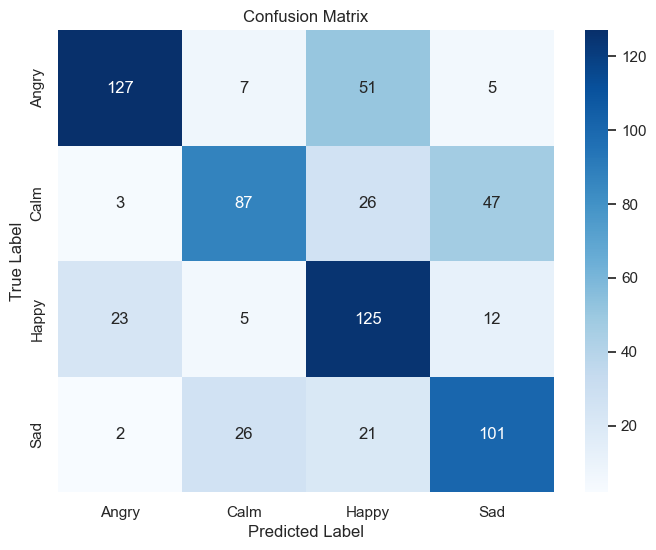

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

class_weights = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}
svm_classifier = SVC(C=8.575065019968523, class_weight=class_weights, gamma='scale', kernel="rbf", max_iter=5000)

svm_classifier.fit(X_train, y_train)

y_pred_test = svm_classifier.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy_test)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred_test)
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [188]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation Scores: [0.66915888 0.64299065 0.68164794 0.66292135 0.67602996]
Mean Cross-Validation Score: 0.666549756729322
Standard Deviation of Cross-Validation Scores: 0.01336288605402601


# Large Song Data

In [2]:
updated_data1=pd.read_csv('D:/SpotifyProject/combined_moods_bigger.csv')

In [3]:
updated_data1

energy  liveness    tempo  speechiness  acousticness  instrumentalness  \
0      0.950    0.5890  161.451       0.1010      0.009110          0.068600   
1      0.868    0.3420  158.124       0.0607      0.000053          0.000039   
2      0.850    0.3560   89.206       0.0930      0.000571          0.043900   
3      0.779    0.1190  103.004       0.0546      0.024300          0.839000   
4      0.971    0.0669  149.993       0.0611      0.013600          0.892000   
...      ...       ...      ...          ...           ...               ...   
6453   0.742    0.1080  127.190       0.0347      0.245000          0.000000   
6454   0.699    0.1710  121.955       0.0902      0.078700          0.000013   
6455   0.895    0.0960  115.993       0.0893      0.032300          0.003100   
6456   0.822    0.5570  121.110       0.3190      0.077500          0.000051   
6457   0.799    0.3700   83.996       0.0703      0.044700          0.000064   

      danceability  duration_ms  loudness  valence  \
0            0.564       207936    -3.820    0.215   
1            0.443       254533    -4.838    0.523   
2            0.667       173577    -6.249    0.505   
3            0.683       219818    -6.324    0.136   
4            0.598       115055    -4.926    0.549   
...            ...          ...       ...      ...   
6453         0.572       210236    -4.589    0.376   
6454         0.754       183640    -5.799    0.386   
6455         0.834       159154    -3.919    0.703   
6456         0.780       169334    -4.535    0.550   
6457         0.712       206903    -4.564    0.591   

                                                   name        artist  \
0                                        Suffer With Me          líue   
1                                 In Bloom - Remastered       Nirvana   
2                                        Keep It Tucked      ThxSoMch   
3                                             Mercenary       F.O.O.L   
4                                          Untitled #13       glwzbll   
...                                                 ...           ...   
6453  Conversations in the Dark - John Legend vs. Da...   John Legend   
6454                                       Kalima Minou       SHANGUY   
6455                                 King of the Jungle       SHANGUY   
6456                                             Simple      Autograf   
6457                                          Mama Said  Lukas Graham   

                                             track_link  \
0     https://open.spotify.com/track/3nfj9Fdbl30TvcZ...   
1     https://open.spotify.com/track/47596JGo5zmiOBT...   
2     https://open.spotify.com/track/1EdQCb51lC8usq4...   
3     https://open.spotify.com/track/6I7FFkcXS58luQo...   
4     https://open.spotify.com/track/1YXV3fSpNgxXSfh...   
...                                                 ...   
6453  https://open.spotify.com/track/4w47S36wQGBhGg0...   
6454  https://open.spotify.com/track/0sf12qNH5qcw8qp...   
6455  https://open.spotify.com/track/1K0j9EFMhgfBzu6...   
6456  https://open.spotify.com/track/66W1rVTnEv86dIk...   
6457  https://open.spotify.com/track/4slSrbTK1sNK4I1...   

                          id   mood  
0     3nfj9Fdbl30TvcZE9sU0Vx  Angry  
1     47596JGo5zmiOBTmaclsPt  Angry  
2     1EdQCb51lC8usq47IMhADP  Angry  
3     6I7FFkcXS58luQoYLzPHi3  Angry  
4     1YXV3fSpNgxXSfhsEgRmtb  Angry  
...                      ...    ...  
6453  75POv7teJDINzveTwnvvtV  Happy  
6454  5kx2iHJL4mziTr6COY1rb5  Happy  
6455  22OkYzlU46O7PF5Kw4YfKF  Happy  
6456  0VwC41v0CzzzNmh49sWvF1  Happy  
6457  5ArQzSBevAdXTxRY6Ulhbq  Happy  

[6458 rows x 15 columns]

In [4]:
updated_data1.shape

(6458, 15)

In [5]:
updated_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6458 entries, 0 to 6457
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            6458 non-null   float64
 1   liveness          6458 non-null   float64
 2   tempo             6458 non-null   float64
 3   speechiness       6458 non-null   float64
 4   acousticness      6458 non-null   float64
 5   instrumentalness  6458 non-null   float64
 6   danceability      6458 non-null   float64
 7   duration_ms       6458 non-null   int64  
 8   loudness          6458 non-null   float64
 9   valence           6458 non-null   float64
 10  name              6458 non-null   object 
 11  artist            6458 non-null   object 
 12  track_link        6458 non-null   object 
 13  id                6458 non-null   object 
 14  mood              6458 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 756.9+ KB


## Data Cleaning

In [6]:
missing_values = updated_data1.isnull().sum()
print(missing_values)

energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
danceability        0
duration_ms         0
loudness            0
valence             0
name                0
artist              0
track_link          0
id                  0
mood                0
dtype: int64


In [7]:
rows_with_missing_values = updated_data1[updated_data1.isnull().any(axis=1)]

# Print or inspect the rows with missing values
print(rows_with_missing_values)

Empty DataFrame
Columns: [energy, liveness, tempo, speechiness, acousticness, instrumentalness, danceability, duration_ms, loudness, valence, name, artist, track_link, id, mood]
Index: []


In [8]:
cleaned_data1 = updated_data1.dropna()

In [9]:
missing_values = cleaned_data1.isnull().sum()
print(missing_values)

energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
danceability        0
duration_ms         0
loudness            0
valence             0
name                0
artist              0
track_link          0
id                  0
mood                0
dtype: int64


In [10]:
cleaned_data1 = cleaned_data1.drop_duplicates(subset=['name', 'id'])
final_row_count = len(cleaned_data1)

print("Count of final rows:", final_row_count)

Count of final rows: 5766


## Data Preprocessing

In [220]:
features_data1 =cleaned_data1.drop(columns=['name', 'artist', 'id','track_link','mood'])
target_data1 = cleaned_data1['mood']

# Standardizing the features
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(features_data1)

## Data visualization

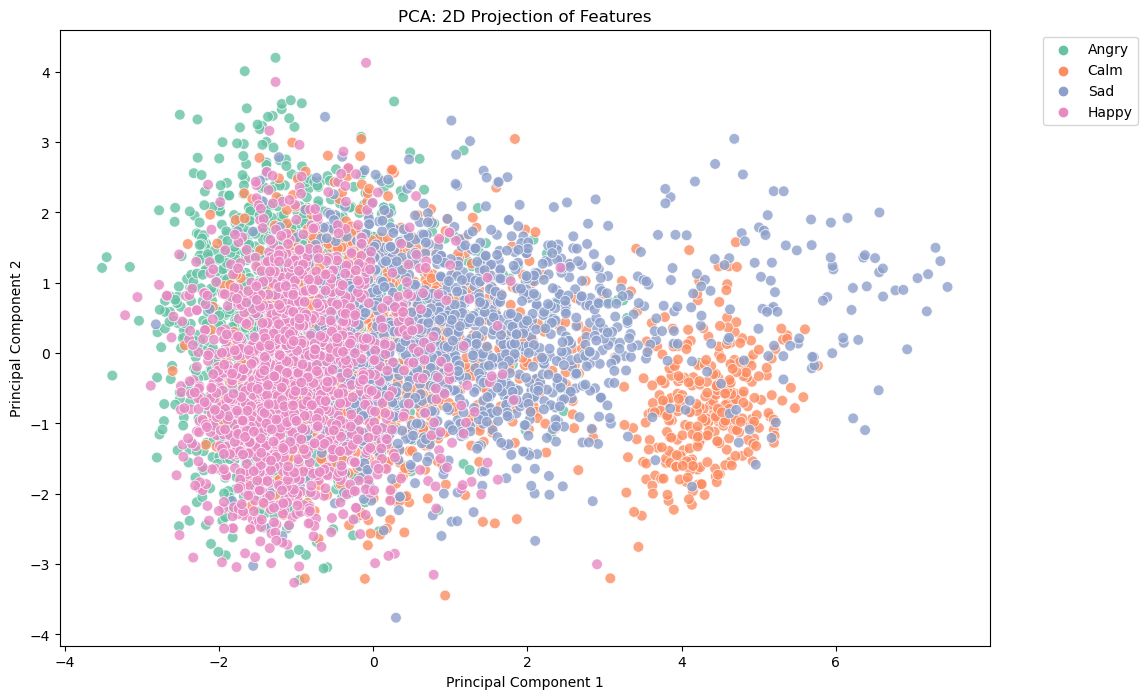

In [14]:
# Apply PCA
pca = PCA(n_components=5)
pca_features = pca.fit_transform(scaled_features1)

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=target_data1, palette='Set2', s=60, alpha=0.8)
plt.title("PCA: 2D Projection of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

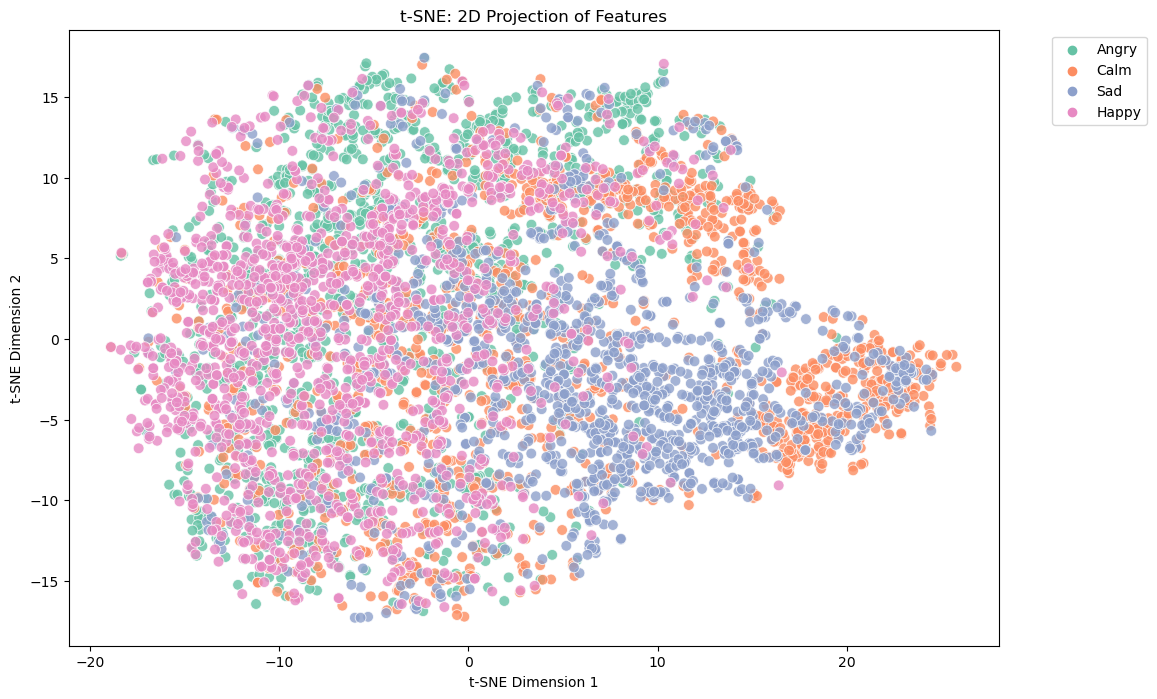

In [15]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(scaled_features1)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=target_data1, palette='Set2', s=60, alpha=0.8)
plt.title("t-SNE: 2D Projection of Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

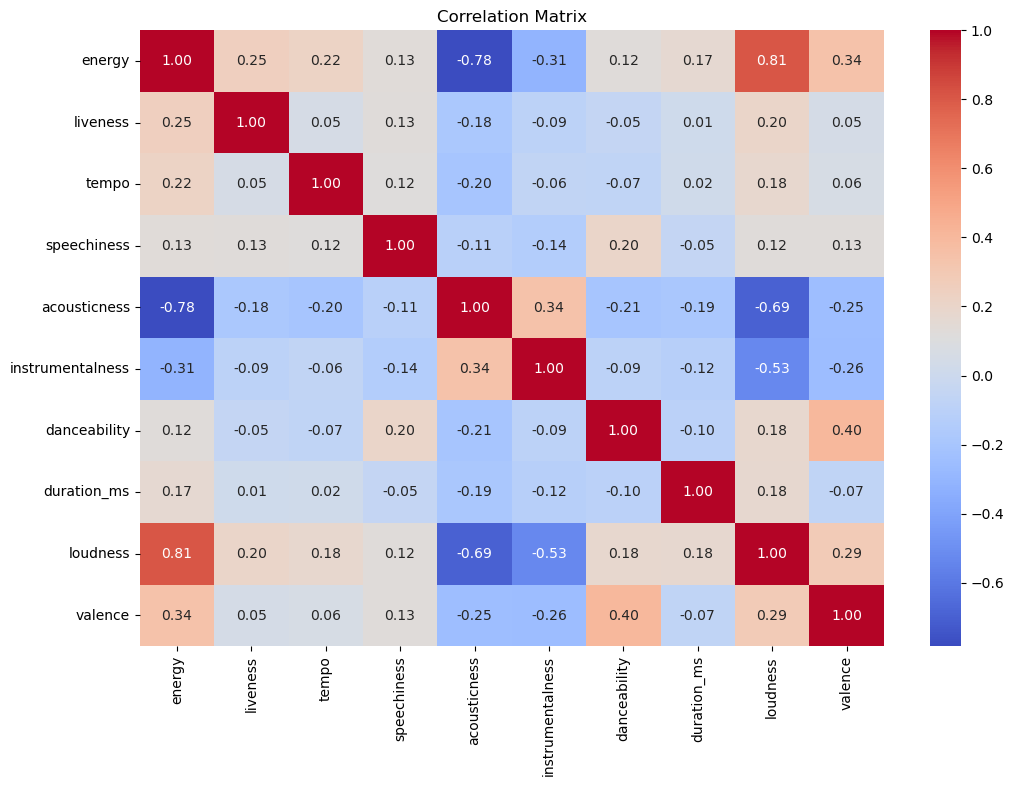

In [16]:
columns_to_drop = ['name', 'artist', 'id', 'track_link','mood']
data1 = cleaned_data1.drop(columns=columns_to_drop)
correlation_matrix = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [221]:
cleaned_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5766 entries, 0 to 6457
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            5766 non-null   float64
 1   liveness          5766 non-null   float64
 2   tempo             5766 non-null   float64
 3   speechiness       5766 non-null   float64
 4   acousticness      5766 non-null   float64
 5   instrumentalness  5766 non-null   float64
 6   danceability      5766 non-null   float64
 7   duration_ms       5766 non-null   int64  
 8   loudness          5766 non-null   float64
 9   valence           5766 non-null   float64
 10  name              5766 non-null   object 
 11  artist            5766 non-null   object 
 12  track_link        5766 non-null   object 
 13  id                5766 non-null   object 
 14  mood              5766 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 720.8+ KB


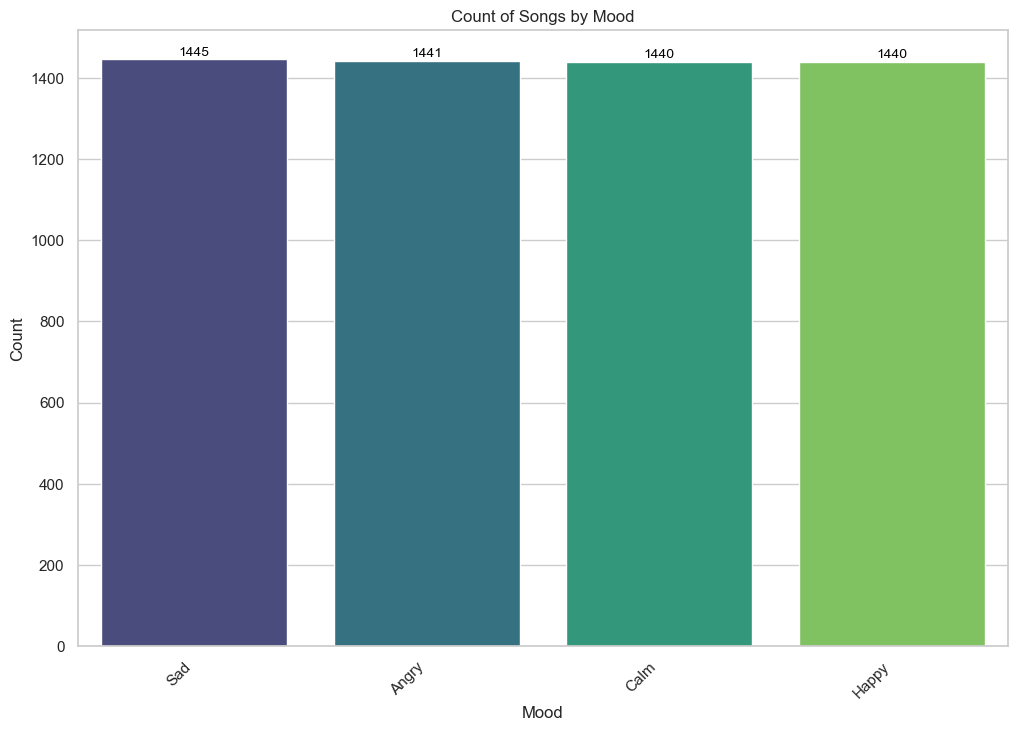

In [222]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=cleaned_data1, x='mood', order=cleaned_data1['mood'].value_counts().index, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Mood')
plt.ylabel('Count')
plt.title('Count of Songs by Mood')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [223]:
cleaned_data1.groupby('mood').count()

energy  liveness  tempo  speechiness  acousticness  instrumentalness  \
mood                                                                          
Angry    1441      1441   1441         1441          1441              1441   
Calm     1440      1440   1440         1440          1440              1440   
Happy    1440      1440   1440         1440          1440              1440   
Sad      1445      1445   1445         1445          1445              1445   

       danceability  duration_ms  loudness  valence  name  artist  track_link  \
mood                                                                            
Angry          1441         1441      1441     1441  1441    1441        1441   
Calm           1440         1440      1440     1440  1440    1440        1440   
Happy          1440         1440      1440     1440  1440    1440        1440   
Sad            1445         1445      1445     1445  1445    1445        1445   

         id  
mood         
Angry  1441  
Calm   1440  
Happy  1440  
Sad    1445

In [23]:
import plotly.express as px

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    cleaned_data1,
    x='valence',
    y='energy',
    z='mood',
    color='mood',
    size_max=10,  
    opacity=0.7, 
    symbol='mood', 
    width=800,
    height=600
)

# Customize layout
fig.update_layout(
    title='3D Scatter Plot of Valence, Energy, and Genre',
    scene=dict(
        zaxis=dict(showticklabels=False),
        xaxis_title='Valence',
        yaxis_title='Energy',
        zaxis_title='mood',
        camera=dict(
            eye=dict(x=1.2, y=1.2, z=0.9),
        )
    )
)

fig.show()

### Feature selection

In [15]:
red_data=cleaned_data1.copy()
columns_to_drop = ['name', 'artist', 'id', 'track_link']
red_data = red_data.drop(columns=columns_to_drop)

In [16]:
#Encode the 'mood' column
label_encoder = LabelEncoder()
red_data['mood_encoded'] = label_encoder.fit_transform(red_data['mood'])

# Extract features and target variable
X = red_data.drop(columns=['mood', 'mood_encoded'])
y = red_data['mood_encoded']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=5)
selector.fit(X, y)
feature_ranking = selector.ranking_
original_feature_names = list(X.columns)
feature_ranking_dict = dict(zip(original_feature_names, feature_ranking))
print(feature_ranking_dict)

{'energy': 1, 'liveness': 6, 'tempo': 1, 'speechiness': 1, 'acousticness': 1, 'instrumentalness': 4, 'danceability': 3, 'duration_ms': 5, 'loudness': 1, 'valence': 2}


In [28]:
features_to_remove = ['liveness', 'instrumentalness', 'duration_ms', 'danceability', 'valence']

red_features1 = X.drop(features_to_remove, axis=1)
red_features1

energy    tempo  speechiness  acousticness  loudness
0      0.950  161.451       0.1010      0.009110    -3.820
1      0.868  158.124       0.0607      0.000053    -4.838
2      0.850   89.206       0.0930      0.000571    -6.249
3      0.779  103.004       0.0546      0.024300    -6.324
4      0.971  149.993       0.0611      0.013600    -4.926
...      ...      ...          ...           ...       ...
6453   0.742  127.190       0.0347      0.245000    -4.589
6454   0.699  121.955       0.0902      0.078700    -5.799
6455   0.895  115.993       0.0893      0.032300    -3.919
6456   0.822  121.110       0.3190      0.077500    -4.535
6457   0.799   83.996       0.0703      0.044700    -4.564

[5766 rows x 5 columns]

In [226]:
X_new = cleaned_data1.drop(columns=['name', 'artist', 'id', 'track_link'], axis=1)

In [32]:
from scipy.stats import pearsonr
# Compute Pearson's correlation coefficient between each feature and the target variable
X_new['mood'] = label_encoder.fit_transform(X_new['mood'])
correlation_coefficients = {}
target_variable = 'mood'
for feature in X_new.columns:
    if feature != target_variable:
        correlation_coefficient, _ = pearsonr(X_new[feature], X_new[target_variable])
        correlation_coefficients[feature] = correlation_coefficient

# Sort features based on their correlation coefficients
sorted_features = sorted(correlation_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print correlation coefficients for each feature
for feature, coefficient in sorted_features:
    print(f"Feature: {feature}, Correlation Coefficient: {coefficient}")

Feature: energy, Correlation Coefficient: -0.37309524233023217
Feature: acousticness, Correlation Coefficient: 0.3347514105880871
Feature: loudness, Correlation Coefficient: -0.2551989575858989
Feature: speechiness, Correlation Coefficient: -0.2366999306922968
Feature: liveness, Correlation Coefficient: -0.14690243931261923
Feature: tempo, Correlation Coefficient: -0.13664055376829373
Feature: danceability, Correlation Coefficient: -0.1346061106334507
Feature: instrumentalness, Correlation Coefficient: -0.1264696718276713
Feature: valence, Correlation Coefficient: -0.08040414540433348
Feature: duration_ms, Correlation Coefficient: -0.00031821139474620837


In [33]:
from itertools import combinations

# Define a function to calculate Pearson correlation coefficient between two series
def pearson_corr(series1, series2):
    return np.corrcoef(series1, series2)[0, 1]

# Calculate correlation coefficients for combinations of features and target attribute
cleaned_data1['mood'] = label_encoder.fit_transform(X_new['mood'])
correlation_coefficients = {}
target_variable = 'mood'

# Get all combinations of features (excluding the target variable)
feature_combinations = combinations(X_new.columns[X_new.columns != target_variable], 2)

# Calculate correlation coefficients for each combination
for feature1, feature2 in feature_combinations:
    correlation_coefficient = pearson_corr(X_new[feature1], X_new[feature2])
    correlation_coefficients[(feature1, feature2)] = correlation_coefficient

# Sort combinations based on their correlation coefficients
sorted_combinations = sorted(correlation_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print correlation coefficients for each combination
for combination, coefficient in sorted_combinations:
    print(f"Combination: {combination}, Correlation Coefficient: {coefficient}")

Combination: ('energy', 'loudness'), Correlation Coefficient: 0.8101670227882547
Combination: ('energy', 'acousticness'), Correlation Coefficient: -0.7843320203894812
Combination: ('acousticness', 'loudness'), Correlation Coefficient: -0.6942914814213197
Combination: ('instrumentalness', 'loudness'), Correlation Coefficient: -0.5305447035042067
Combination: ('danceability', 'valence'), Correlation Coefficient: 0.404955159375824
Combination: ('acousticness', 'instrumentalness'), Correlation Coefficient: 0.3444517651007202
Combination: ('energy', 'valence'), Correlation Coefficient: 0.33844167338515846
Combination: ('energy', 'instrumentalness'), Correlation Coefficient: -0.3125053604677093
Combination: ('loudness', 'valence'), Correlation Coefficient: 0.28527205186779236
Combination: ('instrumentalness', 'valence'), Correlation Coefficient: -0.25558390976431267
Combination: ('acousticness', 'valence'), Correlation Coefficient: -0.2543572095856559
Combination: ('energy', 'liveness'), Cor

In [43]:
corr_X=X.copy()
features_to_remove = ['danceability', 'tempo', 'instrumentalness', 'valence', 'duration_ms']

# Create a new DataFrame with selected features
top5_corr = corr_X.drop(features_to_remove, axis=1)

# Display the new DataFrame
top5_corr

energy  liveness  speechiness  acousticness  loudness
0      0.950    0.5890       0.1010      0.009110    -3.820
1      0.868    0.3420       0.0607      0.000053    -4.838
2      0.850    0.3560       0.0930      0.000571    -6.249
3      0.779    0.1190       0.0546      0.024300    -6.324
4      0.971    0.0669       0.0611      0.013600    -4.926
...      ...       ...          ...           ...       ...
6453   0.742    0.1080       0.0347      0.245000    -4.589
6454   0.699    0.1710       0.0902      0.078700    -5.799
6455   0.895    0.0960       0.0893      0.032300    -3.919
6456   0.822    0.5570       0.3190      0.077500    -4.535
6457   0.799    0.3700       0.0703      0.044700    -4.564

[5766 rows x 5 columns]

## Random Forest

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import numpy as np


# Define search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 15)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt'])
}

# Define objective function
def objective(params):
    model = RandomForestClassifier(**params, random_state=42)
    
    # Evaluate the model using cross-validation on the training set
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Additional metrics
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(precision_score, average='weighted', zero_division=1)).mean()
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='weighted', zero_division=1)).mean()
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted', zero_division=1)).mean()
    
    # Combined metric
    combined_metric = -cv_results.mean() - precision - recall - f1  # Minimize negative combined metric
    return combined_metric

# Choose optimization algorithm (Tree-structured Parzen Estimator)
algorithm = tpe.suggest

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=algorithm, max_evals=50, rstate=np.random.seed(42))

print("Best Hyperparameters:", best)

100%|██████████| 50/50 [55:25<00:00, 66.51s/trial, best loss: -2.5494517353068926] 
Best Hyperparameters: {'max_depth': 10, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 6, 'n_estimators': 183}


Accuracy: 0.6369
Precision: 0.6414
Recall: 0.6369
F1 Score: 0.6363
Classification Report:
              precision    recall  f1-score   support

       Angry       0.71      0.63      0.67       306
        Calm       0.63      0.53      0.58       274
       Happy       0.53      0.61      0.56       277
         Sad       0.69      0.77      0.73       297

    accuracy                           0.64      1154
   macro avg       0.64      0.63      0.63      1154
weighted avg       0.64      0.64      0.64      1154



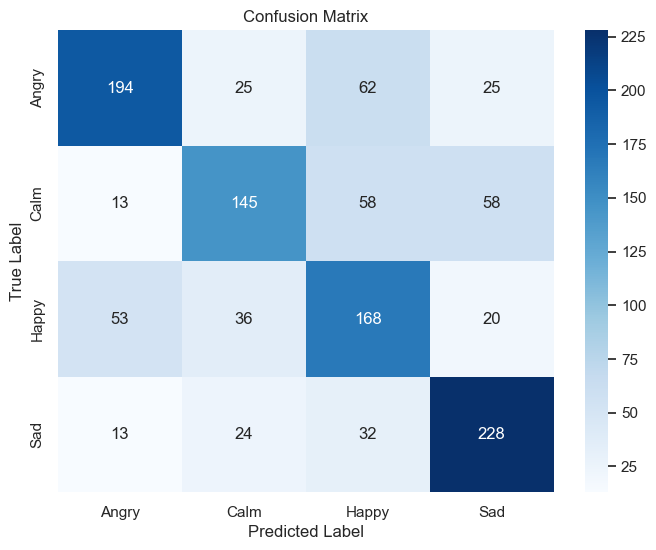

Class: Angry, AUC: 0.8641
Class: Calm, AUC: 0.8525
Class: Happy, AUC: 0.8257
Class: Sad, AUC: 0.9025


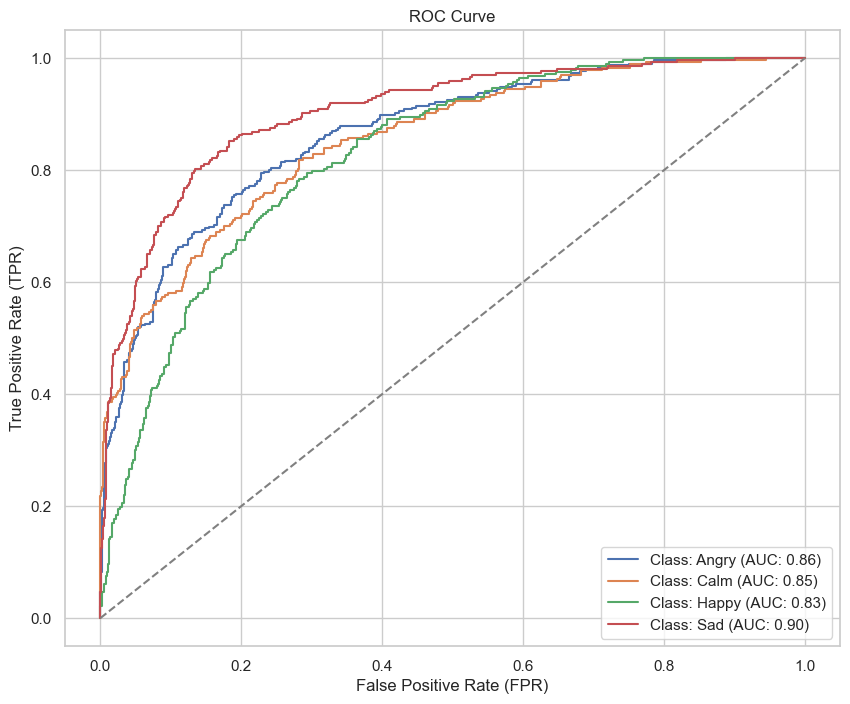

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the model
best_model = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=1,
                                    min_samples_split=6, n_estimators=183, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Inverse transform the labels
predicted_labels = label_encoder.inverse_transform(y_pred)
original_labels = label_encoder.inverse_transform(y_test)

# Retrieve the original class labels
moods = label_encoder.classes_

# Calculate the confusion matrix and classification report
conf_matrix = confusion_matrix(original_labels, predicted_labels)
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=moods, yticklabels=moods)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC Calculation
y_prob = best_model.predict_proba(X_test)
fpr, tpr, auc_dict = dict(), dict(), dict()
class_names = np.unique(y_test)

for i, class_name in enumerate(class_names):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_test == class_name, y_prob[:, i])
    auc_dict[class_name] = roc_auc_score(y_test == class_name, y_prob[:, i])
    print(f"Class: {moods[class_name]}, AUC: {auc_dict[class_name]:.4f}")

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for class_name in class_names:
    plt.plot(fpr[class_name], tpr[class_name], label=f'Class: {moods[class_name]} (AUC: {auc_dict[class_name]:.2f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the number of folds for cross-validation
num_folds = 5

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.62730228 0.65438787 0.63774403 0.62581345 0.61388286]
Mean CV Accuracy: 0.6318260975833307
Standard Deviation of CV Accuracy: 0.013584048919104738


In [35]:
from sklearn.preprocessing import StandardScaler
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.6377816291161178
Classification Report:
              precision    recall  f1-score   support

       Angry       0.72      0.63      0.67       306
        Calm       0.62      0.53      0.57       274
       Happy       0.53      0.62      0.57       277
         Sad       0.69      0.77      0.73       297

    accuracy                           0.64      1154
   macro avg       0.64      0.64      0.63      1154
weighted avg       0.64      0.64      0.64      1154



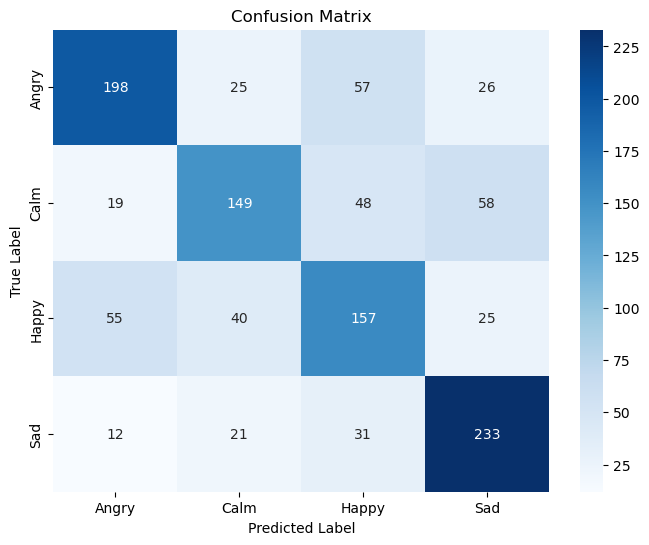

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
best_model_scale = RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=1, min_samples_split=6, n_estimators=183, random_state=42)
best_model_scale.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_model_scale.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)

# Print classification report
print("Classification Report:")
print(report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=moods, yticklabels=moods)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the number of folds for cross-validation
num_folds = 5

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_model_scale, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.62621885 0.65330444 0.63449024 0.62472885 0.60737527]
Mean CV Accuracy: 0.6292235307389136
Standard Deviation of CV Accuracy: 0.014927861178057139


In [37]:
X_train, X_test, y_train, y_test = train_test_split(red_features1, y, test_size=0.2, random_state=42)

In [46]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import numpy as np


# Define search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 15)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt'])
}

# Define objective function
def objective(params):
    model = RandomForestClassifier(**params, random_state=42)
    
    # Evaluate the model using cross-validation on the training set
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Additional metrics
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(precision_score, average='weighted', zero_division=1)).mean()
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='weighted', zero_division=1)).mean()
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted', zero_division=1)).mean()
    
    # Combined metric (e.g., sum or average)
    combined_metric = -cv_results.mean() - precision - recall - f1  # Minimize negative combined metric
    return combined_metric

# Choose optimization algorithm (Tree-structured Parzen Estimator)
algorithm = tpe.suggest

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=algorithm, max_evals=50, rstate=np.random.seed(42))

# Print the best hyperparameters
print("Best Hyperparameters:", best)

100%|██████████| 50/50 [24:56<00:00, 29.94s/trial, best loss: -2.484889900870453] 
Best Hyperparameters: {'max_depth': 26, 'max_features': 0, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 174}


Accuracy: 0.584055459272097
Classification Report:
              precision    recall  f1-score   support

       Angry       0.64      0.62      0.63       306
        Calm       0.54      0.48      0.51       274
       Happy       0.47      0.45      0.46       277
         Sad       0.65      0.76      0.70       297

    accuracy                           0.58      1154
   macro avg       0.58      0.58      0.58      1154
weighted avg       0.58      0.58      0.58      1154



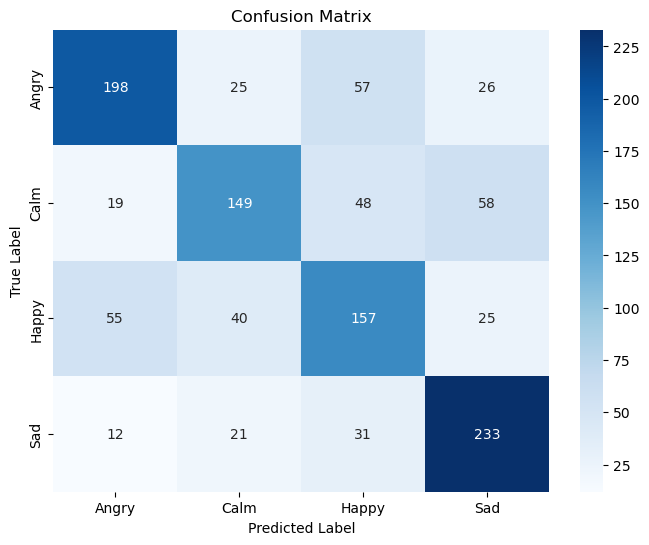

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
best_model_reduced = RandomForestClassifier(max_depth=26,max_features='sqrt',min_samples_leaf=3, min_samples_split=7, n_estimators=186, random_state=42)
best_model_reduced.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model_reduced.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)

# Print classification report
print("Classification Report:")
print(report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=moods, yticklabels=moods)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the number of folds for cross-validation
num_folds = 5

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_model_reduced, X_train, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.57854821 0.5915493  0.59761388 0.5856833  0.5802603 ]
Mean CV Accuracy: 0.5867309983713394
Standard Deviation of CV Accuracy: 0.007093359137434228


In [44]:
X_train, X_test, y_train, y_test = train_test_split(top5_corr, y, test_size=0.2, random_state=42)

In [46]:
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import numpy as np


# Define search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 15)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 10)),
    'max_features': hp.choice('max_features', ['sqrt'])
}

# Define objective function
def objective(params):
    model = RandomForestClassifier(**params, random_state=42)
    
    # Evaluate the model using cross-validation on the training set
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Additional metrics
    precision = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(precision_score, average='weighted', zero_division=1)).mean()
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='weighted', zero_division=1)).mean()
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted', zero_division=1)).mean()
    
    # Combined metric (e.g., sum or average)
    combined_metric = -cv_results.mean() - precision - recall - f1  # Minimize negative combined metric
    return combined_metric

# Choose optimization algorithm (Tree-structured Parzen Estimator)
algorithm = tpe.suggest

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=algorithm, max_evals=50, rstate=np.random.seed(42))

# Print the best hyperparameters
print("Best Hyperparameters:", best)

100%|██████████| 50/50 [35:36<00:00, 42.73s/trial, best loss: -2.3031999164088997]
Best Hyperparameters: {'max_depth': 7, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 9, 'n_estimators': 185}


Accuracy: 0.5537261698440208
Classification Report:
              precision    recall  f1-score   support

       Angry       0.69      0.52      0.59       306
        Calm       0.48      0.45      0.46       274
       Happy       0.42      0.55      0.47       277
         Sad       0.68      0.70      0.69       297

    accuracy                           0.55      1154
   macro avg       0.57      0.55      0.55      1154
weighted avg       0.57      0.55      0.56      1154



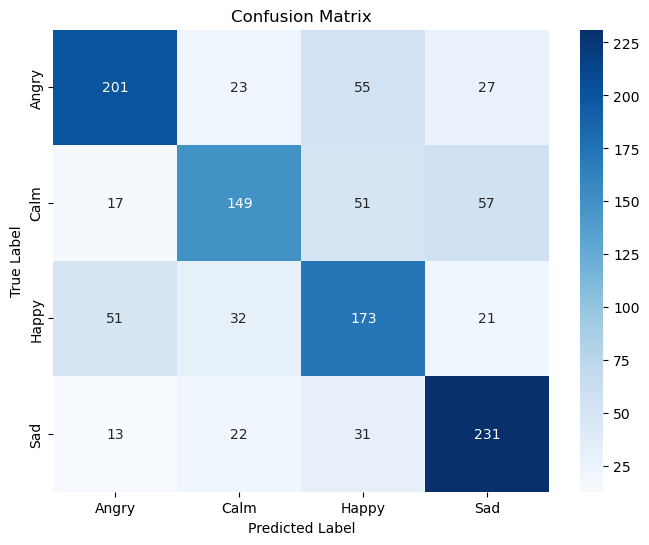

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
best_model_reduced_cor = RandomForestClassifier(max_depth=7,max_features='sqrt',min_samples_leaf=4, min_samples_split=9, n_estimators=185, random_state=42)
best_model_reduced_cor.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model_reduced_cor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)

# Print classification report
print("Classification Report:")
print(report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=moods, yticklabels=moods)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the number of folds for cross-validation
num_folds = 5

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_model_reduced_cor, X_train, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.55579632 0.5687974  0.5856833  0.57809111 0.55639913]
Mean CV Accuracy: 0.5689534503869538
Standard Deviation of CV Accuracy: 0.011782444218728287


## XGBoost Model

In [295]:
X_new = X.copy()

In [61]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Define the hyperparameter search space
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', range(3, 15)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 5),
    'importance_type': 'weight'
}

# Objective function to minimize (e.g., cross-validation score)
def objective(params):
    clf = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return -score  # Minimize negative cross-validation score

# Create Trials object to track the progress
trials = Trials()

# Run hyperparameter optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=150, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 300/300 [10:51<00:00,  2.17s/trial, best loss: -0.5715569572952482]
Best hyperparameters: {'colsample_bytree': 0.9839497614692664, 'gamma': 2.4196279609598985, 'learning_rate': 0.061890489337694796, 'max_depth': 7, 'min_child_weight': 1.4435004047526965, 'n_estimators': 72, 'subsample': 0.8842717061250738}


Accuracy: 0.6534
Precision: 0.6564
Recall: 0.6534
F1 Score: 0.6521
Classification Report:
              precision    recall  f1-score   support

       Angry       0.71      0.66      0.68       306
        Calm       0.66      0.54      0.60       274
       Happy       0.56      0.62      0.59       277
         Sad       0.69      0.78      0.73       297

    accuracy                           0.65      1154
   macro avg       0.65      0.65      0.65      1154
weighted avg       0.66      0.65      0.65      1154



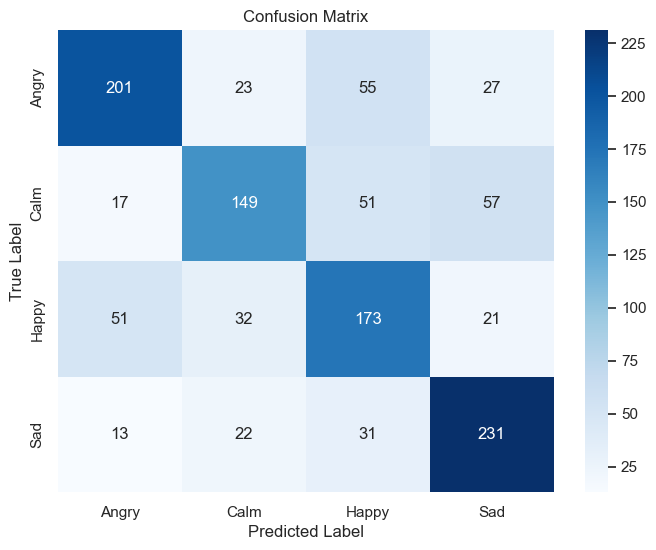

Class: Angry, AUC: 0.8636
Class: Calm, AUC: 0.8541
Class: Happy, AUC: 0.8323
Class: Sad, AUC: 0.8996


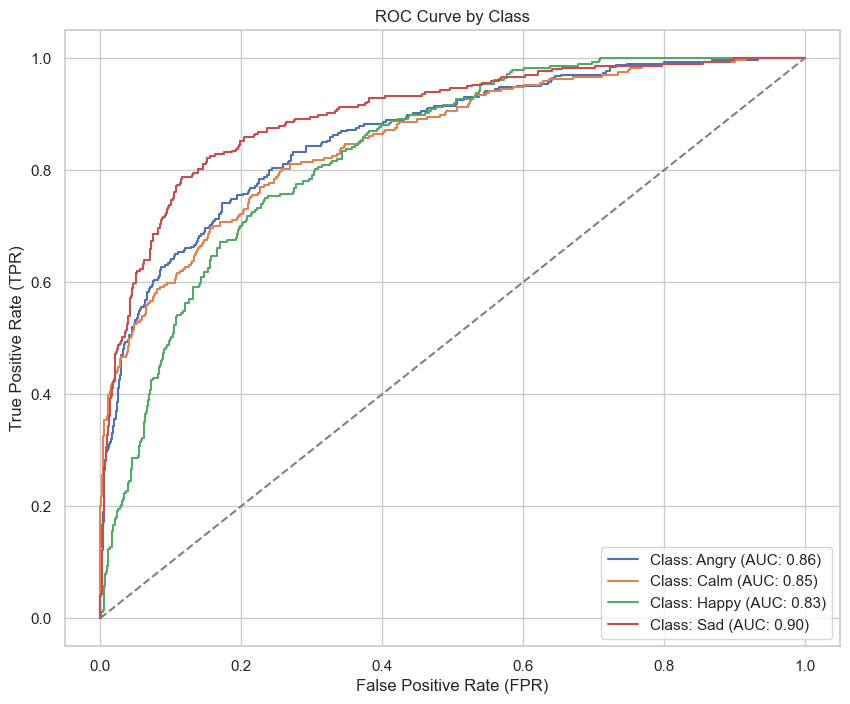

In [191]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming X_train, X_test, y_train, y_test are already defined
# and label_encoder is the LabelEncoder instance used on your labels

# Train the XGBoost model
xgb_model_new = XGBClassifier(colsample_bytree=0.8045020674353668, gamma=0.81162589169546,
                              learning_rate=0.023033377411225277, max_depth=9,
                              min_child_weight=1.9374550666944848, n_estimators=156,
                              subsample=0.9959562482578598, importance_type='weight', random_state=42)
xgb_model_new.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model_new.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Inverse transform the labels for readability
original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

# Generate and print classification report
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
classes = label_encoder.classes_  # Original class names
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
# Get probability estimates
y_prob = xgb_model_new.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, auc_dict = dict(), dict(), dict()
class_names = np.unique(y_test)  # Encoded class labels

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve(y_test == class_name, y_prob[:, i], pos_label=True)
    auc = roc_auc_score(y_test == class_name, y_prob[:, i])
    auc_dict[class_name] = auc
    print(f"Class: {label_encoder.inverse_transform([class_name])[0]}, AUC: {auc:.4f}")

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f'Class: {label_encoder.inverse_transform([class_name])[0]} (AUC: {auc_dict[class_name]:.2f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve by Class')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the number of folds for cross-validation
num_folds = 5

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model_new, X_train, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.63705309 0.66197183 0.65075922 0.63774403 0.60737527]
Mean CV Accuracy: 0.6389806887377997
Standard Deviation of CV Accuracy: 0.018283729262691468


In [64]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Define list of features
all_features = ['energy', 'valence', 'instrumentalness', 'acousticness', 'speechiness', 'danceability', 'loudness', 'liveness', 'tempo', 'duration_ms']  # List all feature names here

# Initialize variables to store best subset of features and its corresponding accuracy
best_subset = None
best_accuracy = 0

# Iterate over different combinations of features
for num_features in range(1, len(all_features) + 1):
    for feature_combination in combinations(all_features, num_features):
        # Train XGBoost model with selected features
        xgb_model_new.fit(X_train[list(feature_combination)], y_train)
        
        # Evaluate the model using cross-validation
        scores = cross_val_score(xgb_model_new, X_train[list(feature_combination)], y_train, cv=5)
        accuracy = scores.mean()
        
        # Check if current subset of features improves accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_subset = feature_combination

# Train XGBoost model with the best subset of features
xgb_model_new.fit(X_train[list(best_subset)], y_train)

# Evaluate the model on the test set
test_accuracy = xgb_model_new.score(X_test[list(best_subset)], y_test)
print("Best subset of features:", best_subset)
print("Best accuracy on training set:", best_accuracy)
print("Accuracy on test set with best subset of features:", test_accuracy)

Best subset of features: ('energy', 'instrumentalness', 'acousticness', 'speechiness', 'danceability', 'loudness', 'liveness', 'tempo', 'duration_ms')
Best accuracy on training set: 0.6357471040157179
Accuracy on test set with best subset of features: 0.634315424610052


In [66]:
# Get feature importance
importance = xgb_model_new.feature_importances_

# Map feature names to their importance scores
feature_names = X_train.columns  # Assuming X_train is a DataFrame
feature_importance_dict = dict(zip(feature_names, importance))

# Sort feature importance dictionary by importance score
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the sorted feature importance
print("Feature Importance:")
for feature, importance_score in sorted_feature_importance:
    print(f"{feature}: {importance_score}")

Feature Importance:
duration_ms: 0.12553361058235168
speechiness: 0.12075787782669067
instrumentalness: 0.11572873592376709
acousticness: 0.11518293619155884
energy: 0.1138184443116188
tempo: 0.11333112418651581
loudness: 0.1064891517162323
danceability: 0.09984210878610611
liveness: 0.0893159955739975


In [67]:
X_red = X_new.drop(columns=['liveness','danceability','valence'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=42)

Accuracy: 0.6404


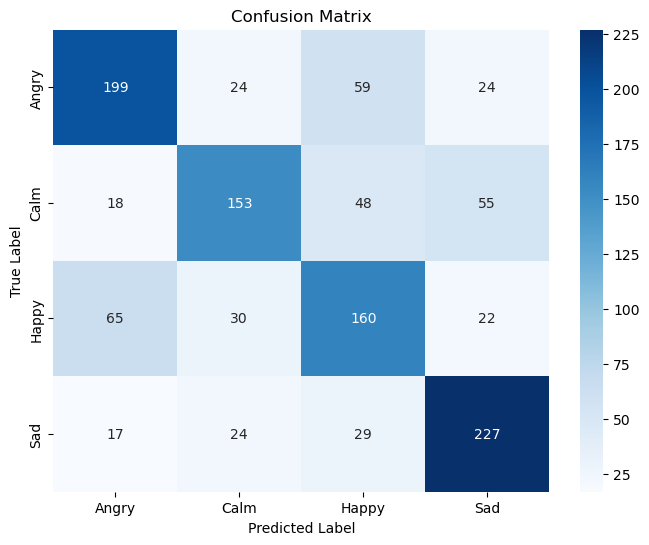

Classification Report:
              precision    recall  f1-score   support

       Angry       0.67      0.65      0.66       306
        Calm       0.66      0.56      0.61       274
       Happy       0.54      0.58      0.56       277
         Sad       0.69      0.76      0.73       297

    accuracy                           0.64      1154
   macro avg       0.64      0.64      0.64      1154
weighted avg       0.64      0.64      0.64      1154



In [68]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# y_encoded = label_encoder.fit_transform(y)
xgb_model_red = XGBClassifier(colsample_bytree= 0.8045020674353668, gamma=  0.81162589169546, learning_rate= 0.023033377411225277, max_depth= 9, min_child_weight= 1.9374550666944848, n_estimators= 156,subsample= 0.9959562482578598,  importance_type='weight',random_state=42)

# Train the XGBoost model
xgb_model_red.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model_red.predict(X_test)

# Evaluate the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)

# Get the unique classes from the target variable
classes = label_encoder.classes_

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("Classification Report:")
print(report)

In [69]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the number of folds for cross-validation
num_folds = 5

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model_red, X_train, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.61321777 0.64463705 0.64750542 0.62798265 0.61062907]
Mean CV Accuracy: 0.6287943915789078
Standard Deviation of CV Accuracy: 0.01532554570750188


In [58]:
X_train, X_test, y_train, y_test = train_test_split(top5_corr, y, test_size=0.2, random_state=42)

In [45]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Define the hyperparameter search space
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', range(3, 15)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 5),
    'importance_type': 'weight'
}

# Objective function to minimize (e.g., cross-validation score)
def objective(params):
    clf = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean()
    return -score  # Minimize negative cross-validation score

# Create Trials object to track the progress
trials = Trials()

# Run hyperparameter optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=150, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 150/150 [03:18<00:00,  1.33s/trial, best loss: -0.5704707134849812]
Best hyperparameters: {'colsample_bytree': 0.6581063882504266, 'gamma': 2.239453380158424, 'learning_rate': 0.13591444315368667, 'max_depth': 8, 'min_child_weight': 3.695494036029082, 'n_estimators': 40, 'subsample': 0.8136870705266959}


Accuracy: 0.5771


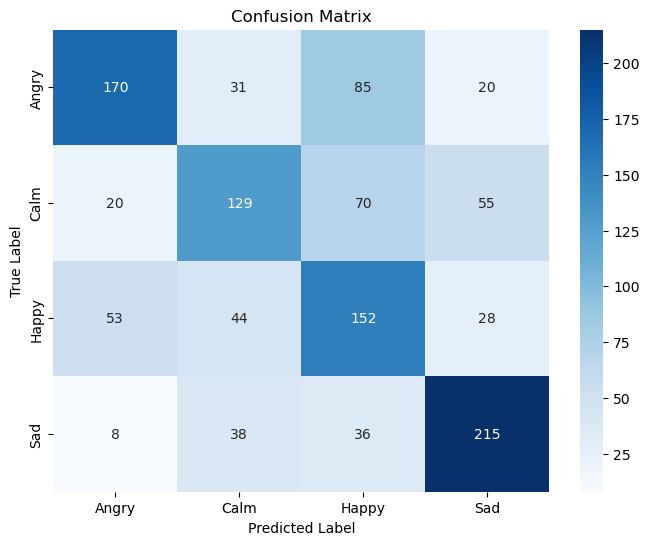

Classification Report:
              precision    recall  f1-score   support

       Angry       0.68      0.56      0.61       306
        Calm       0.53      0.47      0.50       274
       Happy       0.44      0.55      0.49       277
         Sad       0.68      0.72      0.70       297

    accuracy                           0.58      1154
   macro avg       0.58      0.57      0.57      1154
weighted avg       0.59      0.58      0.58      1154



In [59]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# y_encoded = label_encoder.fit_transform(y)
xgb_model_cor = XGBClassifier(colsample_bytree=  0.6581063882504266, gamma=  2.239453380158424, learning_rate= 0.13591444315368667, max_depth= 8, min_child_weight= 3.695494036029082, n_estimators= 65,subsample= 0.9959562482578598,  importance_type='weight',random_state=42)

# Train the XGBoost model
xgb_model_cor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model_cor.predict(X_test)

# Evaluate the XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)

report = classification_report(original_labels, predicted_labels)

# Get the unique classes from the target variable
classes = label_encoder.classes_

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("Classification Report:")
print(report)

In [89]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the number of folds for cross-validation
num_folds = 5

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model_cor, X_train, y_train, cv=cv, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print mean and standard deviation of cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation Scores: [0.52871073 0.57313109 0.57700651 0.56399132 0.56399132]
Mean CV Accuracy: 0.5613661948329389
Standard Deviation of CV Accuracy: 0.017106691622376907


In [499]:
import joblib

# Save the trained model to a file
joblib.dump(xgb_model_new, 'xgboost_model_pred.pkl')

['xgboost_model_pred.pkl']

## MLP model

In [276]:
X_mlp = cleaned_data1.drop(columns=['name', 'artist', 'id', 'track_link', 'mood'], axis=1)
y_mlp = cleaned_data1['mood']

In [277]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_mlp)

In [278]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mlp)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y_encoded, test_size=0.2, random_state=42)

Fold 1:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5666 - loss: 1.3641
Validation accuracy: 0.584055483341217
Fold 2:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3609 - loss: 1.5081
Validation accuracy: 0.5186470150947571
Fold 3:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4043 - loss: 1.4525
Validation accuracy: 0.5654813647270203
Fold 4:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5524 - loss: 1.2446
Validation accuracy: 0.5706851482391357
Fold 5:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4938 - loss: 1.3070
Validation accuracy: 0.5750216841697693
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6206 - loss: 1.2474
Test accuracy: 0.597920298576355
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

       Angry       0.63      0.51      0.57       306
        Calm       0.57      0.50      0.53       274
       Happy       0.51      0.64      0.57       277
         Sa

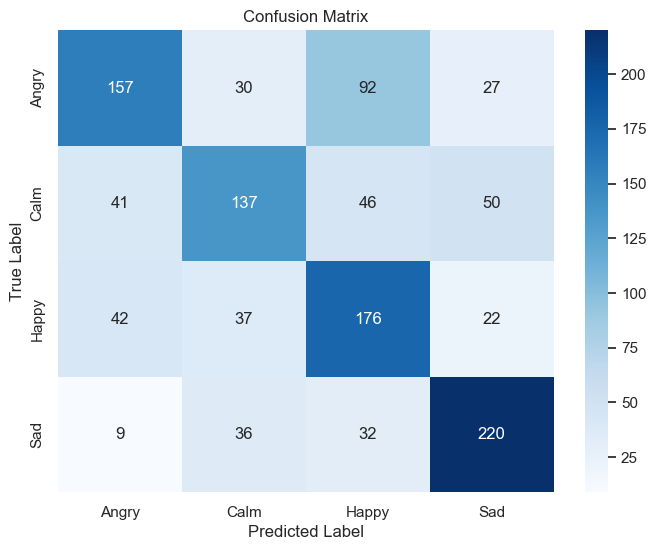

In [279]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define your model
modelmlp = keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.02, l2=0.02)),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.02, l2=0.02)),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.02, l2=0.02)),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(4, activation='softmax') 
])

# Compile the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
modelmlp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold_num, (train_indices, val_indices) in enumerate(k_fold.split(scaled_features)):
    print(f"Fold {fold_num + 1}:")

    # Split data into training and validation sets
    X_train, X_val = scaled_features[train_indices], scaled_features[val_indices]
    y_train, y_val = y_encoded[train_indices], y_encoded[val_indices]

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = modelmlp.fit(X_train, y_train, epochs=1000, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_acc = modelmlp.evaluate(X_val, y_val)
    print(f'Validation accuracy: {val_acc}')

# Evaluate the model on the test set
test_loss, test_acc = modelmlp.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = modelmlp.predict(X_test)
predicted_labelsnp = np.argmax(predictions, axis=1)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(predicted_labelsnp)

# Generate and print classification report
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)  # Use encoded labels
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [280]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from hyperopt import hp, tpe, Trials, fmin
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the search space for hyperparameters
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.1)),
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'l1': hp.loguniform('l1', np.log(0.0001), np.log(0.1)),
    'l2': hp.loguniform('l2', np.log(0.0001), np.log(0.1)),
    'batch_size': hp.choice('batch_size', [16, 32, 64]),
}

# Define the objective function for hyperparameter optimization
def objective(params):
    # Build the model
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=params['l1'], l2=params['l2'])),
        layers.BatchNormalization(),  # Adding batch normalization
        layers.Dropout(params['dropout_rate']),
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=params['l1'], l2=params['l2'])),
        layers.BatchNormalization(),  # Adding batch normalization
        layers.Dropout(params['dropout_rate']),
        layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=params['l1'], l2=params['l2'])),
        layers.BatchNormalization(),  # Adding batch normalization
        layers.Dense(4, activation='softmax')
    ])
    
    # Compile the model
    optimizer = keras.optimizers.RMSprop(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Perform k-fold cross-validation
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_acc_list = []
    for train_indices, val_indices in k_fold.split(scaled_features):
        # Split data into training and validation sets
        X_train, X_val = scaled_features[train_indices], scaled_features[val_indices]
        y_train, y_val = y_encoded[train_indices], y_encoded[val_indices]

        # Train the model
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=1000, batch_size=params['batch_size'],
                            validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

        # Evaluate the model on the validation set
        _, val_acc = model.evaluate(X_val, y_val)
        val_acc_list.append(val_acc)
    
    # Return the negative average validation accuracy as the objective value (to be minimized)
    return -np.mean(val_acc_list)

# Perform hyperparameter optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best hyperparameters:", best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

 1/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6875 - loss: 1.0456
 9/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 1.2645 
30/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5880 - loss: 1.0948
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5923 - loss: 1.0852

 1/37 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.3750 - loss: 1.3316
18/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4429 - loss: 1.2001  
33/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4968 - loss: 1.1337
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 1.1210

 1/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4062 - loss: 1.1952
23/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5140 - loss: 1.1421 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 1.0883

 1/37 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5938 - loss: 0.9729
15/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4905 - loss: 1.1098 
33/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [282]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

best_hyperparameters = {
    'dropout_rate':  0.16632960650388212,
    'l1': 0.0017582415589717697,
    'l2': 0.0005684003814944408,
}
# Define your model
model_opt = keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=best_hyperparameters['l1'], l2=best_hyperparameters['l2'])),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dropout(best_hyperparameters['dropout_rate']),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=best_hyperparameters['l1'], l2=best_hyperparameters['l2'])),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dropout(best_hyperparameters['dropout_rate']),
    layers.Dense(32, activation='tanh', kernel_regularizer=keras.regularizers.l1_l2(l1=best_hyperparameters['l1'], l2=best_hyperparameters['l2'])),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(4, activation='softmax') 
])

# Compile the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.0004307248127732972)
model_opt.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold_num, (train_indices, val_indices) in enumerate(k_fold.split(scaled_features)):
    print(f"Fold {fold_num + 1}:")

    # Split data into training and validation sets
    X_train, X_val = scaled_features[train_indices], scaled_features[val_indices]
    y_train, y_val = y_encoded[train_indices], y_encoded[val_indices]

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model_opt.fit(X_train, y_train, epochs=1000, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_acc = model_opt.evaluate(X_val, y_val)
    print(f'Validation accuracy: {val_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model_opt.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model_opt.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report and confusion matrix
print(classification_report(y_test, predicted_labels))
print(confusion_matrix(y_test, predicted_labels))

Fold 1:


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5447 - loss: 1.1998
Validation accuracy: 0.6109185218811035
Fold 2:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5719 - loss: 1.1673
Validation accuracy: 0.6166521906852722
Fold 3:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5887 - loss: 1.1359
Validation accuracy: 0.635732889175415
Fold 4:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5907 - loss: 1.0544
Validation accuracy: 0.6582827568054199
Fold 5:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - loss: 1.0951
Validation accuracy: 0.6582827568054199
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6629 - loss: 1.0260
Test accuracy: 0.65684574842453
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.70      0.61      0.66       306
           1       0.69      0.57      0.62       274
           2       0.55      0.64      0.59       277
           3       0.70      0.80      0.75

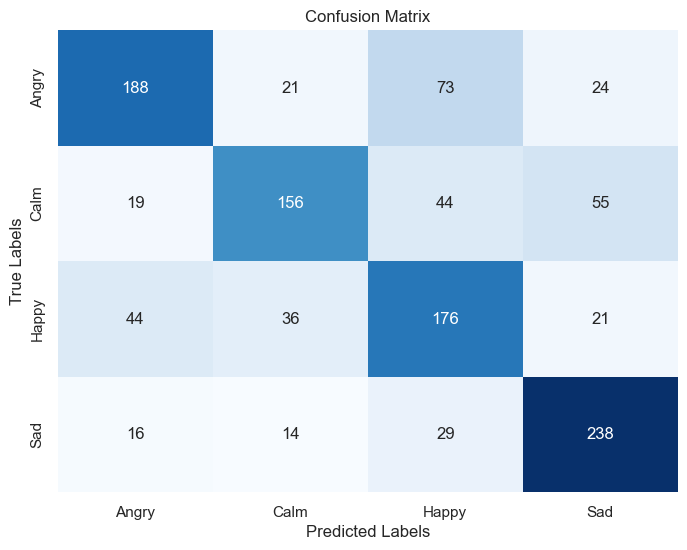

In [283]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Convert numerical labels back to original categorical labels for better visualization
class_names = label_encoder.classes_

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [290]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Define your model
model_test1 = keras.Sequential([
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(128, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(128, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(4, activation='softmax') 
])

# Compile the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model_test1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold_num, (train_indices, val_indices) in enumerate(k_fold.split(scaled_features)):
    print(f"Fold {fold_num + 1}:")

    # Split data into training and validation sets
    X_train, X_val = scaled_features[train_indices], scaled_features[val_indices]
    y_train, y_val = y_encoded[train_indices], y_encoded[val_indices]

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model_test1.fit(X_train, y_train, epochs=1000, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_acc = model_test1.evaluate(X_val, y_val)
    print(f'Validation accuracy: {val_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model_test1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model_test1.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report and confusion matrix
print(classification_report(y_test, predicted_labels))
print(confusion_matrix(y_test, predicted_labels))

Fold 1:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5536 - loss: 1.0307
Validation accuracy: 0.6074523329734802
Fold 2:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5415 - loss: 1.0433
Validation accuracy: 0.5845620036125183
Fold 3:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5406 - loss: 0.9945
Validation accuracy: 0.635732889175415
Fold 4:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6398 - loss: 0.8508
Validation accuracy: 0.6513442993164062
Fold 5:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5961 - loss: 0.9193
Validation accuracy: 0.6730268597602844
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6565 - loss: 0.8465
Test accuracy: 0.6655112504959106
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       306
           1       0.68      0.56      0.61       274
           2       0.57      0.67      0.62       277
           3       0.70      0.8

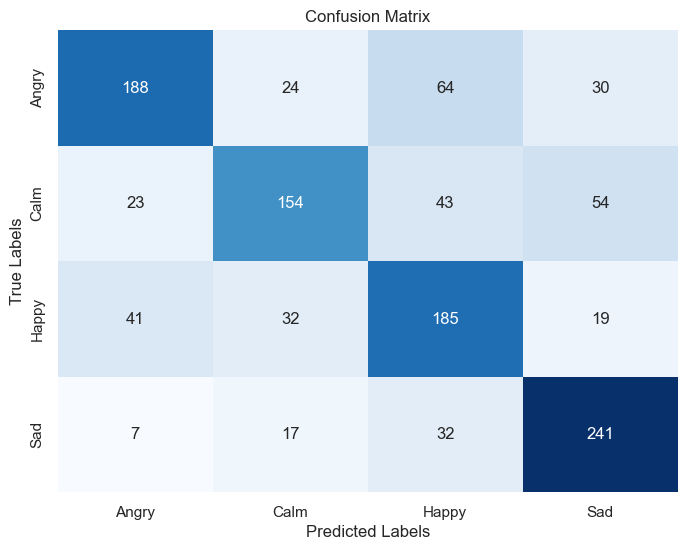

In [291]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Convert numerical labels back to original categorical labels for better visualization
class_names = label_encoder.classes_

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Fold 1:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5671 - loss: 1.0222
Validation accuracy: 0.5909878611564636
Fold 2:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5730 - loss: 1.0210
Validation accuracy: 0.6053772568702698
Fold 3:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6183 - loss: 0.9174
Validation accuracy: 0.6435385942459106
Fold 4:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 0.7952
Validation accuracy: 0.6704249978065491
Fold 5:
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.8344
Validation accuracy: 0.6981786489486694
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.7750
Test accuracy: 0.6923743486404419
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report:
              precision    recall  f1-score   support

       Angry       0.70      0.72      0.71       306
        Calm       0.75      0.60      0.67       274
       Happy       0.61      0.63      0.62       277
        

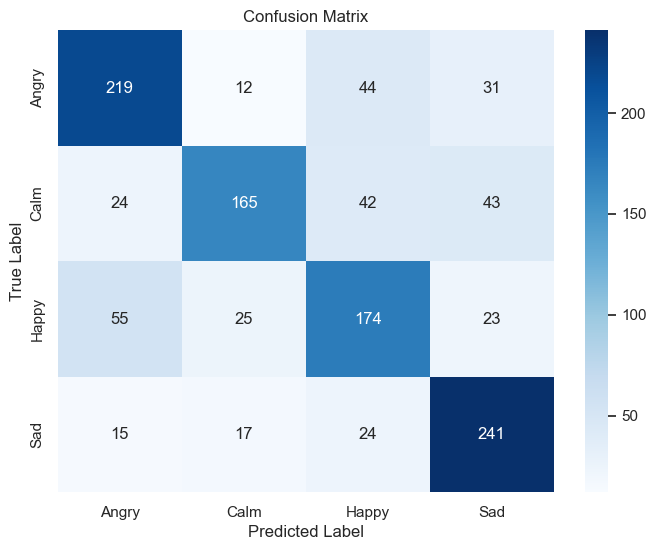

In [251]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Define your model
model_test2 = keras.Sequential([
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(128, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(),  # Adding batch normalization
    layers.Dense(4, activation='softmax') 
])

# Compile the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model_test2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold_num, (train_indices, val_indices) in enumerate(k_fold.split(scaled_features)):
    print(f"Fold {fold_num + 1}:")

    # Split data into training and validation sets
    X_train, X_val = scaled_features[train_indices], scaled_features[val_indices]
    y_train, y_val = y_encoded[train_indices], y_encoded[val_indices]

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model_test2.fit(X_train, y_train, epochs=1000, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    val_loss, val_acc = model_test2.evaluate(X_val, y_val)
    print(f'Validation accuracy: {val_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model_test2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model_test2.predict(X_test)
predicted_labelsnum = np.argmax(predictions, axis=1)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(predicted_labelsnum)

# Generate and print classification report
report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)  # Use encoded labels
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Class: 0, AUC: 0.8955
Class: 1, AUC: 0.8901
Class: 2, AUC: 0.8745
Class: 3, AUC: 0.9265


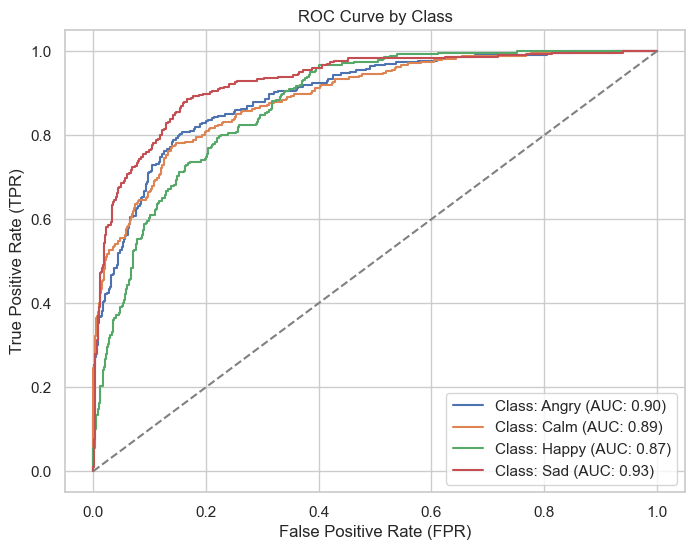

In [254]:
y_prob = model_test2.predict(X_test)

# Step 2: Compute ROC curve and TPR, FPR for each class
fpr = dict()
tpr = dict()
auc_dict = {}

class_names = np.unique(y_test)  # Assuming 'y_test' contains the true labels in encoded form

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve((y_test == class_name), y_prob[:, i], pos_label=1)
    auc = roc_auc_score((y_test == class_name), y_prob[:, i])
    auc_dict[class_name] = auc

    # Optionally print TPR, FPR, and AUC for each class
    print(f"Class: {class_name}, AUC: {auc:.4f}")

# Step 3: Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f'Class: {label_encoder.inverse_transform([class_name])[0]} (AUC: {auc_dict[class_name]:.2f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve by Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [292]:
model_test2.save("mlp_mood_predictor.keras")

## SVM model

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [503]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

# Search space for hyperparameters
space = {
    'C': hp.uniform('C', 0.1, 10.0), 
    'gamma': hp.choice('gamma', ['auto', 'scale', hp.uniform('gamma_val', 0.01, 1.0)]),
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
}

# Objective function to minimize
def objective(params):
    svm_classifier = SVC(**params)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    return -mean_cv_score 

trials = Trials()

# Hyperparameter optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Best hyperparameters:", best)

100%|██████████| 100/100 [15:32<00:00,  9.33s/trial, best loss: -0.6177324249182733]
Best hyperparameters: {'C': 1.2520931733977099, 'class_weight': 0, 'gamma': 2, 'gamma_val': 0.1811665088250035}


Test Set Accuracy: 0.6091854419410745
Classification Report:
              precision    recall  f1-score   support

       Angry       0.66      0.58      0.61       306
        Calm       0.64      0.49      0.55       274
       Happy       0.50      0.64      0.56       277
         Sad       0.67      0.73      0.70       297

    accuracy                           0.61      1154
   macro avg       0.62      0.61      0.61      1154
weighted avg       0.62      0.61      0.61      1154



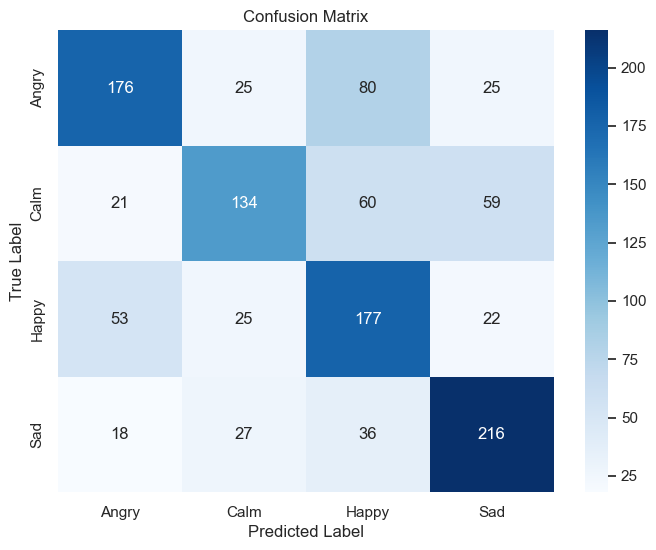

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

class_weights = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}
svm_classifier = SVC(C=1.2520931733977099, class_weight=class_weights, gamma='scale', kernel="rbf", max_iter=3000)

svm_classifier.fit(X_train_scaled, y_train)

y_pred_test = svm_classifier.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

original_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred_test)

report = classification_report(original_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(original_labels, predicted_labels)  
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [302]:
# Perform k-fold cross-validation (e.g., with k=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validation scores using accuracy
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation Scores: [0.6056338  0.624052   0.63015184 0.61171367 0.59544469]
Mean Cross-Validation Score: 0.6133992004756724
Standard Deviation of Cross-Validation Scores: 0.012487115965364077


Class: 0, AUC: 0.8150
Class: 1, AUC: 0.7883
Class: 2, AUC: 0.7958
Class: 3, AUC: 0.8740


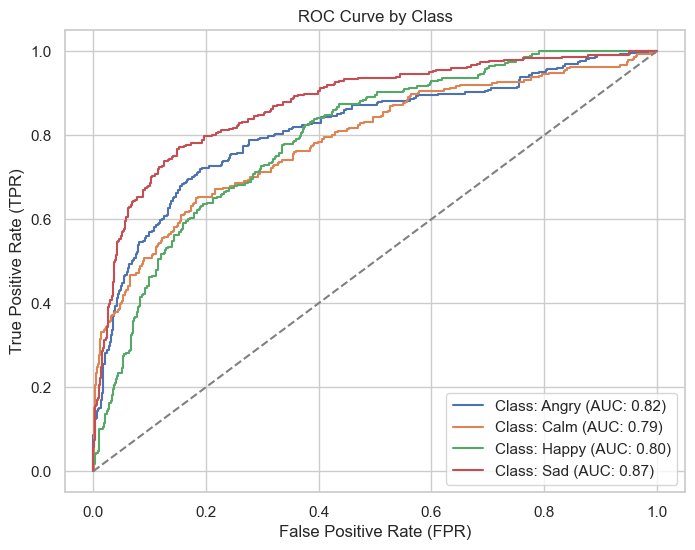

In [306]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probability estimates for each class
y_prob = svm_classifier.decision_function(X_test_scaled)

# Compute ROC curve and TPR, FPR
fpr = dict()
tpr = dict()
auc_dict = {}

class_names = np.unique(y_test)

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve((y_test == class_name), y_prob[:, i], pos_label=1)
    auc = roc_auc_score((y_test == class_name), y_prob[:, i])
    auc_dict[class_name] = auc

    # Optionally print TPR, FPR, and AUC for each class
    print(f"Class: {class_name}, AUC: {auc:.4f}")

# Step 3: Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f'Class: {label_encoder.inverse_transform([class_name])[0]} (AUC: {auc_dict[class_name]:.2f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve by Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Voting classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, hp, fmin, tpe, space_eval
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the maximum number of iterations without improvement before stopping
MAX_NO_IMPROVEMENT = 3

# Initialize variables to track iterations without improvement
no_improvement_count = 0
best_score = float('inf')

rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()
mlp_clf = MLPClassifier()
svc_clf = SVC(probability=True)

rf_pipe = make_pipeline(StandardScaler(), rf_clf)
xgb_pipe = make_pipeline(StandardScaler(), xgb_clf)
mlp_pipe = make_pipeline(StandardScaler(), mlp_clf)
svc_pipe = make_pipeline(StandardScaler(), svc_clf)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('mlp', mlp_clf),
        ('svc', svc_clf)
    ],
    voting='soft' # 'hard' or 'soft' voting
)

space = {
    'rf__n_estimators': hp.choice('rf__n_estimators', range(50,150)),
    'rf__max_depth': hp.choice('rf__max_depth', range(5, 20)),
    'xgb__n_estimators': hp.choice('xgb__n_estimators', range(50, 100, 150)),
    'xgb__max_depth': hp.choice('xgb__max_depth', range(3, 7)),
    'mlp__hidden_layer_sizes': hp.choice('mlp__hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 100)]),
    'mlp__alpha': hp.loguniform('mlp__alpha', -6, -2),
    'svc__C': hp.loguniform('svc__C', -4, 4),
}

def objective(params):
    global no_improvement_count, best_score
    voting_clf.set_params(**params)
    score = -cross_val_score(voting_clf, X_train, y_train, cv=5).mean()
    
    # Check if the current score is better than the best score
    if score < best_score:
        best_score = score
        no_improvement_count = 0
    else:
        no_improvement_count += 1
    
    # Check if early stopping criteria is met
    if no_improvement_count >= MAX_NO_IMPROVEMENT:
        return {'loss': best_score, 'status': STATUS_OK, 'early_stop': True}
    else:
        return {'loss': score, 'status': STATUS_OK}

# Perform hyperparameter optimization with early stopping
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

# Get the best hyperparameters
best_params = space_eval(space, best)
print("Best Parameters:")
print(best_params)

100%|██████████| 50/50 [43:36<00:00, 52.34s/trial, best loss: -0.5544433294242344]
Best Parameters:
{'mlp__alpha': 0.03815715119586617, 'mlp__hidden_layer_sizes': (100,), 'rf__max_depth': 19, 'rf__n_estimators': 148, 'svc__C': 54.44912217566847, 'xgb__max_depth': 5, 'xgb__n_estimators': 50}


In [319]:
voting_clf.set_params(**best_params)
voting_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.524263431542461


In [320]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, hp, fmin, tpe, space_eval
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#  Maximum number of iterations without improvement before stopping
MAX_NO_IMPROVEMENT = 3

# Variables to track iterations without improvement
no_improvement_count = 0
best_score = float('inf')

rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()
mlp_clf = MLPClassifier()
svc_clf = SVC()

rf_pipe = make_pipeline(StandardScaler(), rf_clf)
xgb_pipe = make_pipeline(StandardScaler(), xgb_clf)
mlp_pipe = make_pipeline(StandardScaler(), mlp_clf)
svc_pipe = make_pipeline(StandardScaler(), svc_clf)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('mlp', mlp_clf),
        ('svc', svc_clf)
    ],
    voting='hard' # 'hard' or 'soft' voting
)

space = {
    'rf__n_estimators': hp.choice('rf__n_estimators', range(50,150)),
    'rf__max_depth': hp.choice('rf__max_depth', range(5, 20)),
    'xgb__n_estimators': hp.choice('xgb__n_estimators', range(50, 100, 150)),
    'xgb__max_depth': hp.choice('xgb__max_depth', range(3, 7)),
    'mlp__hidden_layer_sizes': hp.choice('mlp__hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 100)]),
    'mlp__alpha': hp.loguniform('mlp__alpha', -6, -2),
    'svc__C': hp.loguniform('svc__C', -4, 4),
}

def objective(params):
    global no_improvement_count, best_score
    voting_clf.set_params(**params)
    score = -cross_val_score(voting_clf, X_train, y_train, cv=5).mean()
    
    # Checks if the current negative CV score is better than the best score
    if score < best_score:
        best_score = score
        no_improvement_count = 0
    else:
        no_improvement_count += 1
    
    # Checks if the early stopping criteria is met
    if no_improvement_count >= MAX_NO_IMPROVEMENT:
        return {'loss': best_score, 'status': STATUS_OK, 'early_stop': True}
    else:
        return {'loss': score, 'status': STATUS_OK}

# Performs hyperparameter optimization with early stopping
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

best_params = space_eval(space, best)
print("Best Parameters:")
print(best_params)

100%|██████████| 50/50 [20:26<00:00, 24.53s/trial, best loss: -0.6210019670836633]
Best Parameters:
{'mlp__alpha': 0.006709035753467123, 'mlp__hidden_layer_sizes': (100,), 'rf__max_depth': 9, 'rf__n_estimators': 128, 'svc__C': 0.6097869736592817, 'xgb__max_depth': 4, 'xgb__n_estimators': 50}


In [333]:
voting_clf.set_params(**best_params)
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6325823223570191


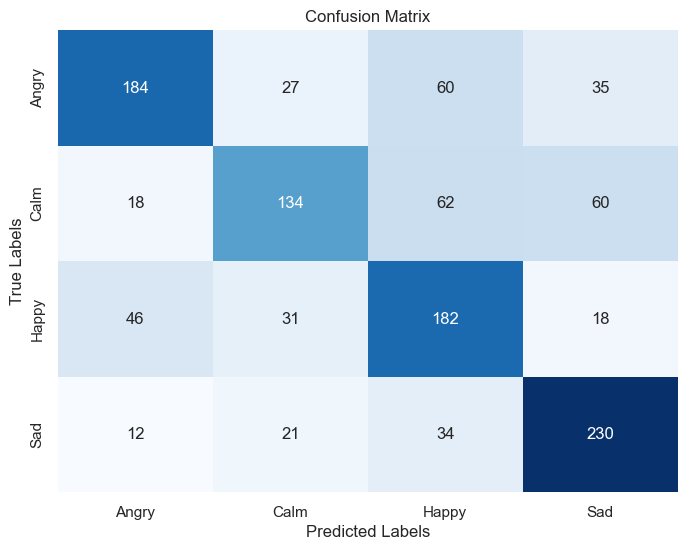

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       306
           1       0.63      0.49      0.55       274
           2       0.54      0.66      0.59       277
           3       0.67      0.77      0.72       297

    accuracy                           0.63      1154
   macro avg       0.64      0.63      0.63      1154
weighted avg       0.64      0.63      0.63      1154



In [334]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert numerical labels back to original categorical labels for better visualization
class_names = label_encoder.classes_

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [339]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the voting classifier
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())


Cross-Validation Scores: [0.58288191 0.56554713 0.65292842 0.61605206 0.66160521]
Mean Cross-Validation Score: 0.615802943810032
Standard Deviation of Cross-Validation Scores: 0.03764479144522798


# Outputting Mood 

In [366]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time

# Spotify API credentials
client_id = 'e1c2d91fd9684a3cb5f07f7fe8520f57'
client_secret = '57a52618f7ab4c6e88a28cf1b1961f02'
redirect_uri = 'http://localhost:5000/callback'
username = 'g094fs46zt7i1qjpub6ppiy5z'

# Authenticate with Spotify API
scope = 'user-read-recently-played'
token = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=token, requests_timeout=20)

recently_played = sp.current_user_recently_played(limit=15)

# Extract track IDs
track_ids = [item['track']['id'] for item in recently_played['items']]

# Get audio features for each track
audio_features = []
for track_id in track_ids:
    features = sp.audio_features(track_id)[0]
    audio_features.append(features)

# Prepare data for DataFrame
data = []
for item, features in zip(recently_played['items'], audio_features):
    track = item['track']
    row = {
        'name': track['name'],
        'artist': track['artists'][0]['name'],
        'track_id': track['id'],
        'acousticness': features['acousticness'],
        'danceability': features['danceability'],
        'energy': features['energy'],
        'instrumentalness': features['instrumentalness'],
        'liveness': features['liveness'],
        'speechiness': features['speechiness'],
        'tempo': features['tempo'],
        'valence': features['valence'],
        'loudness': features['loudness'],
        'duration_ms' : track['duration_ms']
    }
    data.append(row)

# Create DataFrame
df = pd.DataFrame(data)

# Store DataFrame as CSV
df.to_csv('recently_played_audio_features.csv', index=False)

print("CSV file generated successfully.")

CSV file generated successfully.


In [18]:
recently_listened_to_songs = pd.read_csv("selected_instances.csv")
recently_listened_to_songs

energy  liveness    tempo  speechiness  acousticness  instrumentalness  \
0    0.863    0.6390  110.018       0.0381       0.00460          0.000000   
1    0.805    0.1470  131.001       0.3320       0.07150          0.000000   
2    0.836    0.1030  148.399       0.0665       0.06510          0.761000   
3    0.225    0.1280   81.055       0.0348       0.76700          0.003490   
4    0.401    0.1160  111.825       0.0308       0.71200          0.000000   
5    0.473    0.1090   75.801       0.1290       0.86600          0.000000   
6    0.594    0.1160  113.983       0.0293       0.11400          0.046200   
7    0.619    0.1100  177.937       0.0368       0.62000          0.000000   
8    0.707    0.1430  125.005       0.0595       0.18100          0.000004   
9    0.814    0.1260  119.041       0.0999       0.13200          0.000010   
10   0.726    0.2660  128.044       0.0366       0.00308          0.000081   
11   0.525    0.0921   80.870       0.0944       0.44000          0.000007   

    danceability  duration_ms  loudness  valence  \
0          0.496       185587    -4.153    0.243   
1          0.474       176125    -5.997    0.109   
2          0.560       136005   -11.011    0.261   
3          0.332       298899    -8.697    0.297   
4          0.677       232852    -8.467    0.195   
5          0.464       208687   -10.086    0.604   
6          0.648       244013    -7.027    0.544   
7          0.411       186192    -6.834    0.337   
8          0.721       158206    -6.364    0.743   
9          0.738       225850    -4.414    0.483   
10         0.506       204418    -5.964    0.266   
11         0.761       238805    -6.900    0.531   

                                                 name             artist  \
0                                                Numb        Linkin Park   
1                       Flawlëss (feat. Lil Uzi Vert)               Yeat   
2                                              Menace        mikeeysmind   
3                                   Happier Than Ever      Billie Eilish   
4                                           This Town        Niall Horan   
5      If the World Was Ending (feat. Julia Michaels)            JP Saxe   
6                                         Reflections  The Neighbourhood   
7                                              Saturn                SZA   
8                                            Sundress         A$AP Rocky   
9   Know No Better (feat. Travis Scott, Camila Cab...        Major Lazer   
10        Sun Is Never Going Down (feat. Dawn Golden)      Martin Garrix   
11                                         Heat Waves      Glass Animals   

                                           track_link                      id  \
0   https://open.spotify.com/track/67G6iaOw8DZqp1z...  2nLtzopw4rPReszdYBJU6h   
1   https://open.spotify.com/track/2y4uALh6kU3nATt...  1a019wP7IdYLexwbmfZPm3   
2   https://open.spotify.com/track/7j2lHwCfEhmqX34...  7j2lHwCfEhmqX34QIcAckx   
3   https://open.spotify.com/track/4RVwu0g32PAqgUi...  4RVwu0g32PAqgUiJoXsdF8   
4   https://open.spotify.com/track/6lV2MSQmRIkycDS...  0qvzXomUDJVaUboy2wMfiS   
5   https://open.spotify.com/track/2z63wddJsUqhvAL...  2kJwzbxV2ppxnQoYw4GLBZ   
6   https://open.spotify.com/track/5hwUsRKvnO5yThj...  2xql0pid3EUwW38AsywxhV   
7   https://open.spotify.com/track/3Q4gttWQ6hxqWOa...  1bjeWoagtHmUKputLVyDxQ   
8   https://open.spotify.com/track/2aPTvyE09vUCRwV...  2aPTvyE09vUCRwVvj0I8WK   
9   https://open.spotify.com/track/3hENlPbIlUZXQ3M...  3T3la6mcfhrTKS884NKeyC   
10  https://open.spotify.com/track/2ud5ukcAgwOki5P...  6x7r0lpyqxBKGq8J7LFMeu   
11  https://open.spotify.com/track/02MWAaffLxlfxAU...  02MWAaffLxlfxAUY7c5dvx   

     mood  
0   Angry  
1   Angry  
2   Angry  
3     Sad  
4     Sad  
5     Sad  
6    Calm  
7    Calm  
8    Calm  
9   Happy  
10  Happy  
11  Happy

In [19]:
duplicates = recently_listened_to_songs[recently_listened_to_songs.duplicated(subset=['name', 'id'])]

# Print duplicates
print("Duplicate rows based on columns 'column1' and 'column2':")
print(duplicates)

Duplicate rows based on columns 'column1' and 'column2':
Empty DataFrame
Columns: [energy, liveness, tempo, speechiness, acousticness, instrumentalness, danceability, duration_ms, loudness, valence, name, artist, track_link, id, mood]
Index: []


In [20]:
cleaned_rec = recently_listened_to_songs.drop_duplicates(subset=['name', 'id'])
final_row_count = len(cleaned_rec)

print("Count of final rows:", final_row_count)

Count of final rows: 12


In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# Preprocess your data (scale numerical features, encode categorical features, etc.)
# Assuming you used StandardScaler during training

# Define numerical features and scaler
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'loudness', 'tempo', 'duration_ms']
scaler = StandardScaler()

# Load your chosen trained model
model_choice = input("Enter 1 for MLP Mood Predictor from Large Dataset or 2 for MLP mood predictor from Small Dataset: ")

if model_choice == "1":
    # Load MLP Mood Predictor model
    loaded_model = tf.keras.models.load_model("mlp_mood_predictor.keras")
elif model_choice == "2":
    loaded_model = tf.keras.models.load_model("mlp_mood_predictor_small.keras")
else:
    print("Invalid choice. Please enter either 1 or 2.")

# Perform predictions based on the chosen model
if model_choice in ["1", "2"]:
    # Scale numerical features
    cleaned_rec[numerical_features] = scaler.fit_transform(cleaned_rec[numerical_features])

    # Make predictions
    X_pred = cleaned_rec[numerical_features]
    predictions = loaded_model.predict(X_pred)

    # Postprocess predictions (if necessary)
    predicted_labels = np.argmax(predictions, axis=1)

    # Add predicted labels to your dataframe
    cleaned_rec['predicted_mood'] = label_encoder.inverse_transform(predicted_labels)

    # Save the dataframe with predicted labels
    cleaned_rec.to_csv("predicted_dataset.csv", index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


In [371]:
pred_data = pd.read_csv("predicted_dataset.csv")

# Get the predicted mood with the highest count
most_common_predicted_mood = pred_data['predicted_mood'].value_counts().idxmax()

print("Predicted mood with the highest count:", most_common_predicted_mood)

Predicted mood with the highest count: Sad


In [372]:
data_rec= cleaned_data1.copy()
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'loudness','duration_ms']
data_rec

# # # Create feature vectors for each song
# feature_vectors = data_rec[features].values

# # Optionally, you might want to normalize or standardize the feature vectors
# # For example, using StandardScaler from scikit-learn
# scaled_feature_vectors = scaler.fit_transform(feature_vectors)
# scaled_feature_vectors

energy  liveness    tempo  speechiness  acousticness  instrumentalness  \
0      0.950    0.5890  161.451       0.1010      0.009110          0.068600   
1      0.868    0.3420  158.124       0.0607      0.000053          0.000039   
2      0.850    0.3560   89.206       0.0930      0.000571          0.043900   
3      0.779    0.1190  103.004       0.0546      0.024300          0.839000   
4      0.971    0.0669  149.993       0.0611      0.013600          0.892000   
...      ...       ...      ...          ...           ...               ...   
6453   0.742    0.1080  127.190       0.0347      0.245000          0.000000   
6454   0.699    0.1710  121.955       0.0902      0.078700          0.000013   
6455   0.895    0.0960  115.993       0.0893      0.032300          0.003100   
6456   0.822    0.5570  121.110       0.3190      0.077500          0.000051   
6457   0.799    0.3700   83.996       0.0703      0.044700          0.000064   

      danceability  duration_ms  loudness  valence  \
0            0.564       207936    -3.820    0.215   
1            0.443       254533    -4.838    0.523   
2            0.667       173577    -6.249    0.505   
3            0.683       219818    -6.324    0.136   
4            0.598       115055    -4.926    0.549   
...            ...          ...       ...      ...   
6453         0.572       210236    -4.589    0.376   
6454         0.754       183640    -5.799    0.386   
6455         0.834       159154    -3.919    0.703   
6456         0.780       169334    -4.535    0.550   
6457         0.712       206903    -4.564    0.591   

                                                   name        artist  \
0                                        Suffer With Me          líue   
1                                 In Bloom - Remastered       Nirvana   
2                                        Keep It Tucked      ThxSoMch   
3                                             Mercenary       F.O.O.L   
4                                          Untitled #13       glwzbll   
...                                                 ...           ...   
6453  Conversations in the Dark - John Legend vs. Da...   John Legend   
6454                                       Kalima Minou       SHANGUY   
6455                                 King of the Jungle       SHANGUY   
6456                                             Simple      Autograf   
6457                                          Mama Said  Lukas Graham   

                                             track_link  \
0     https://open.spotify.com/track/3nfj9Fdbl30TvcZ...   
1     https://open.spotify.com/track/47596JGo5zmiOBT...   
2     https://open.spotify.com/track/1EdQCb51lC8usq4...   
3     https://open.spotify.com/track/6I7FFkcXS58luQo...   
4     https://open.spotify.com/track/1YXV3fSpNgxXSfh...   
...                                                 ...   
6453  https://open.spotify.com/track/4w47S36wQGBhGg0...   
6454  https://open.spotify.com/track/0sf12qNH5qcw8qp...   
6455  https://open.spotify.com/track/1K0j9EFMhgfBzu6...   
6456  https://open.spotify.com/track/66W1rVTnEv86dIk...   
6457  https://open.spotify.com/track/4slSrbTK1sNK4I1...   

                          id   mood  
0     3nfj9Fdbl30TvcZE9sU0Vx  Angry  
1     47596JGo5zmiOBTmaclsPt  Angry  
2     1EdQCb51lC8usq47IMhADP  Angry  
3     6I7FFkcXS58luQoYLzPHi3  Angry  
4     1YXV3fSpNgxXSfhsEgRmtb  Angry  
...                      ...    ...  
6453  75POv7teJDINzveTwnvvtV  Happy  
6454  5kx2iHJL4mziTr6COY1rb5  Happy  
6455  22OkYzlU46O7PF5Kw4YfKF  Happy  
6456  0VwC41v0CzzzNmh49sWvF1  Happy  
6457  5ArQzSBevAdXTxRY6Ulhbq  Happy  

[5766 rows x 15 columns]

In [373]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
print("Your Predicted Mood is", most_common_predicted_mood, "Would you like to choose another mood?")
choice = input("Enter your choice (Y/N): ").upper()

if choice == "Y":
    print("Please select your Mood:")
    print("1. Happy")
    print("2. Sad")
    print("3. Calm")
    print("4. Angry")
    choice_mood = input("Enter your choice (1-4): ")
    if choice_mood in ["1", "2", "3", "4"]:
        moods = ["Happy", "Sad", "Calm", "Angry"]
        most_common_predicted_mood = moods[int(choice_mood) - 1]
    else:
        print("Invalid choice or mood unchanged.")
        # Handle invalid choice here if necessary

# Filter songs based on the most common predicted mood
songs = pred_data[pred_data['predicted_mood'] == most_common_predicted_mood]

if not songs.empty:
    # Select 3 random songs from the filtered dataset
    random_songs = songs.sample(n=min(3, len(songs)))

    # Print the randomly selected songs
    print("3 Random Songs with Predicted Mood as", most_common_predicted_mood)
    for idx, song in enumerate(random_songs.iterrows(), 1):
        print(f"{idx}. {song[1]['name']} by {song[1]['artist']}")
else:
    print("No songs found for the selected mood.")

# Ask the user to select a song
selected_song_index = int(input("Select a song (1-3): ")) - 1
selected_song = random_songs.iloc[selected_song_index]

# Fetch audio features of the selected song
selected_song_features = selected_song[features].values.reshape(1, -1)

filtered_feature_vectors = data_rec[data_rec['mood'] == most_common_predicted_mood]
filtered_feature_vectors

feature_vectors = filtered_feature_vectors[features].values

# Optionally, you might want to normalize or standardize the feature vectors
# For example, using StandardScaler from scikit-learn
scaled_feature_vectors = scaler.fit_transform(feature_vectors)
scaled_feature_vectors


Your Predicted Mood is Sad Would you like to choose another mood?


Please select your Mood:
1. Happy
2. Sad
3. Calm
4. Angry
3 Random Songs with Predicted Mood as Sad
1. One Night/All Night by Justice
2. Satisfaction by Subriser
3. Phantom Pt. II by Justice


array([[-0.89439587,  1.1325187 ,  1.01208283, ..., -0.29000995,
         1.04723389,  0.95750658],
       [ 0.22772343, -0.50646377,  0.67795821, ..., -1.10848988,
         1.12370924,  0.46346423],
       [-1.06587254,  0.89187445,  1.16931795, ...,  0.99252361,
         0.57682156,  0.44942514],
       ...,
       [-0.82821189,  0.1764456 ,  0.42736474, ..., -0.3698357 ,
         0.76961058,  1.01922845],
       [ 0.73613673,  1.1325187 , -0.55535474, ...,  0.81158527,
        -0.40473067, -0.282162  ],
       [ 1.38895144, -0.8381626 , -1.59212379, ..., -0.4709483 ,
        -0.30140002, -0.35690346]])

In [374]:
similarities = cosine_similarity(selected_song_features, scaled_feature_vectors)

# Get indices of top 30 similar songs
similar_song_indices = similarities.argsort()[0][-31:-1]

# Extract top 30 similar songs from the dataset of all songs
similar_songs = filtered_feature_vectors.iloc[similar_song_indices].drop_duplicates(subset=['name', 'track_link'])

# Create a playlist of similar songs
playlist = similar_songs[['name', 'artist', 'track_link']]

print("\nPlaylist of 30 Similar Songs:")
print(playlist)


Playlist of 30 Similar Songs:
                                           name               artist  \
3838                    Tell Me Why I'm Waiting              Timmies   
4479                           if you only knew    Alexander Stewart   
3247                                   The Girl                INTRN   
3320                              Same Old Mess                INTRN   
4502                                   dear god        Nessa Barrett   
4346                        Talking to the Moon        Another Lover   
4387                                    Changes                 Hayd   
3302                                Sea of Love         Animal House   
4865            I Will Follow You into the Dark  Death Cab for Cutie   
3246                         Stranded - Sped Up          Keno Carter   
4240                            do you love me?           Lil Darkie   
2911                                      Truce    Twenty One Pilots   
3198                             

In [375]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import webbrowser
# import pandas as pd
# import time

# Spotify API credentials
client_id = 'e1c2d91fd9684a3cb5f07f7fe8520f57'
client_secret = '57a52618f7ab4c6e88a28cf1b1961f02'
redirect_uri = 'http://localhost:5000/callback'
username = 'g094fs46zt7i1qjpub6ppiy5z'

# Authenticate with Spotify API
scope = 'playlist-modify-public'
token = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=token, requests_timeout=20)

playlist_name = input("Enter the name of your playlist: ")
playlist_description = input("Enter the description of your playlist: ")
user_id = sp.current_user()['id']
new_playlist = sp.user_playlist_create(user=user_id, name=playlist_name, description=playlist_description)

# Get the playlist ID of the newly created playlist
playlist_id = new_playlist['id']
# Iterate through similar songs and add them to the playlist
for index, row in similar_songs.iterrows():
    # Extract track ID from the track link
    track_id = row['track_link'].split('/')[-1]
    # Add track to the playlist
    sp.playlist_add_items(playlist_id=playlist_id, items=[track_id])

# Get the URL of the playlist
playlist_url = new_playlist['external_urls']['spotify']

# Open the playlist URL in the default web browser
webbrowser.open(playlist_url)

print("Your playlist is now playing on Spotify!")

Your playlist is now playing on Spotify!
